In [ ]:
#Copyright 2024 Marc Burillo

#This code is not authorized for use, copying, modification, or distribution without explicit permission from the author.
#This notebooks implements the analysis of the files generated with MLRassessmentVARp.py and RFEoptimalVARp.py

Because this is project is to be published very soon, we only show a minimal example of the analysis that we can produce. By no means this represents all the power of our method, but it shows how the output could be treated. Here we show an example with 15 models of 3 channels 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
import pandas as pd
from scipy.stats import mannwhitneyu
from itertools import combinations

# Initial Setup

In [3]:
#channel distribution in brain regions
l_PMv=np.arange(1,65)-1
l_PMd=np.arange(65,97)-1
r_PMd=np.arange(97,161)-1
r_PMv=np.arange(161,225)-1
l_M1=np.arange(225,256)-1

In [5]:
options = np.loadtxt('channels.txt').astype(int) #options are the channels included in each VAR(p) model: from 1 to 5 channels explored in a same model in our project. See channels.txt for an example
if len(np.shape(options)) == 1:
    options.reshape(1,-1)
colors = [
    "red", "blue", "green", "orange", "purple", "brown", "pink",
    "gray", "olive", "cyan", "magenta", "lime", "teal", "indigo",
    "gold", "silver", "navy", "maroon", "darkgreen", "coral",
    "chocolate", "darkblue", "orchid", "khaki", "plum", "salmon",
    "turquoise", "peru", "darkorange", "lightblue"
]

In [68]:
name_regions=['l_PMv','l_PMd','r_PMd','r_PMv', 'l_M1']
colors_regions=['blue','orange','red','green','purple']

It's important to run all this cells to generate the figures

In [69]:
coord = pd.read_csv('coordinates.csv',sep = '\t', header=None)
logL = np.load('all_orderlogL5.npy')
bic = np.load('all_orderbic5.npy')
el=np.loadtxt("election_scoring.npy")#scoring by which the models were selected

In [70]:
top = [47, 64, 71, 77, 79, 80, 151, 156, 232]
l_PMv=np.arange(1,65)-1
l_PMd=np.arange(65,97)-1
r_PMd=np.arange(97,161)-1
r_PMv=np.arange(161,225)-1
l_M1=np.arange(225,256)-1
regions=[l_PMv, l_PMd, r_PMd, r_PMv, l_M1]

In [71]:
means= np.zeros(256)
for i in range(256):
    means[i]=el[i] #if more than 1 scoring value, here you can compute the mean

# Analysis according to a Score

In [73]:
output = means #output and means both are S_BC, sorry I should put everywhere the same variable:(

In [74]:
S_BC=np.zeros(15)
for ind, i in enumerate(options):
    S_BC[ind]=np.mean(output[:][i])

In [ ]:
orders =np.loadtxt('orders.txt')

#### Run only first time

In [ ]:
counter =0
for counter, channels in enumerate(options):
    order = orders[counter]
    code = 'order'+str(p0)+'_channels'
    code += "_" + "_".join(np.array(channels).astype(str)

    if counter == 0:
        cmT = np.array([np.load('VARcmT'+code+'.npy')])
        cmTT = np.array([np.load('VARcmTT'+code+'.npy')])
        prec = np.array(np.load('VARaccT'+code+'.npy'))
        acc = np.array(np.load('VARprecT'+code+'.npy'))
        print(np.shape(cmT))
    else:
        cmT = np.vstack((cmT,np.array([np.load('VARcmT'+code+'.npy')])))
        cmTT = np.vstack((cmTT, np.array([np.load('VARcmTT'+code+'.npy')])))
        prec = np.vstack((prec, np.load('VARaccT'+code+'.npy')))
        acc = np.vstack((acc, np.load('VARprecT'+code+'.npy')))

In [ ]:
np.save('acc.npy',acc)
np.save('prec.npy',prec)
np.save('cmT.npy', cmT)
np.save('cmTT.npy', cmTT)

#### Continue

In [80]:
acc = np.load('acc.npy')
prec = np.load('prec.npy')

In [81]:
#SH_acc= np.load('SH_acc.npy')
#SH_prec = np.load('SH_prec.npy')

In [82]:
l_PMv=np.arange(1,65)-1
l_PMd=np.arange(65,97)-1
r_PMd=np.arange(97,161)-1
r_PMv=np.arange(161,225)-1
l_M1=np.arange(225,256)-1

In [83]:
colors = []
region =[]

for i in options:
    if i in l_PMv:
        colors.append('blue')
        region.append(1)
    if i in l_PMd:
        colors.append('orange')
        region.append(2)
    if i in r_PMd:
        colors.append('red')
        region.append(3)
    if i in r_PMv:
        colors.append('green')
        region.append(4)
    if i in l_M1:
        colors.append('purple')
        region.append(5)

In [84]:
colors=colors_regions+['grey']*10

In [85]:
#ONLY FOR THIS EXAMPLE

import itertools
TICKS = name_regions+list(itertools.combinations(name_regions, 3))
TICKS

['l_PMv',
 'l_PMd',
 'r_PMd',
 'r_PMv',
 'l_M1',
 ('l_PMv', 'l_PMd', 'r_PMd'),
 ('l_PMv', 'l_PMd', 'r_PMv'),
 ('l_PMv', 'l_PMd', 'l_M1'),
 ('l_PMv', 'r_PMd', 'r_PMv'),
 ('l_PMv', 'r_PMd', 'l_M1'),
 ('l_PMv', 'r_PMv', 'l_M1'),
 ('l_PMd', 'r_PMd', 'r_PMv'),
 ('l_PMd', 'r_PMd', 'l_M1'),
 ('l_PMd', 'r_PMv', 'l_M1'),
 ('r_PMd', 'r_PMv', 'l_M1')]

In [86]:
TICKS = name_regions + list(itertools.combinations(name_regions, 3))

# Convertim les combinacions a strings amb salts de línia entre les regions
TICKS_labels = ['\n'.join(comb) if isinstance(comb, tuple) else comb for comb in TICKS]


In [87]:
TICKS_labels

['l_PMv',
 'l_PMd',
 'r_PMd',
 'r_PMv',
 'l_M1',
 'l_PMv\nl_PMd\nr_PMd',
 'l_PMv\nl_PMd\nr_PMv',
 'l_PMv\nl_PMd\nl_M1',
 'l_PMv\nr_PMd\nr_PMv',
 'l_PMv\nr_PMd\nl_M1',
 'l_PMv\nr_PMv\nl_M1',
 'l_PMd\nr_PMd\nr_PMv',
 'l_PMd\nr_PMd\nl_M1',
 'l_PMd\nr_PMv\nl_M1',
 'r_PMd\nr_PMv\nl_M1']

## Accuracy electrode-wise

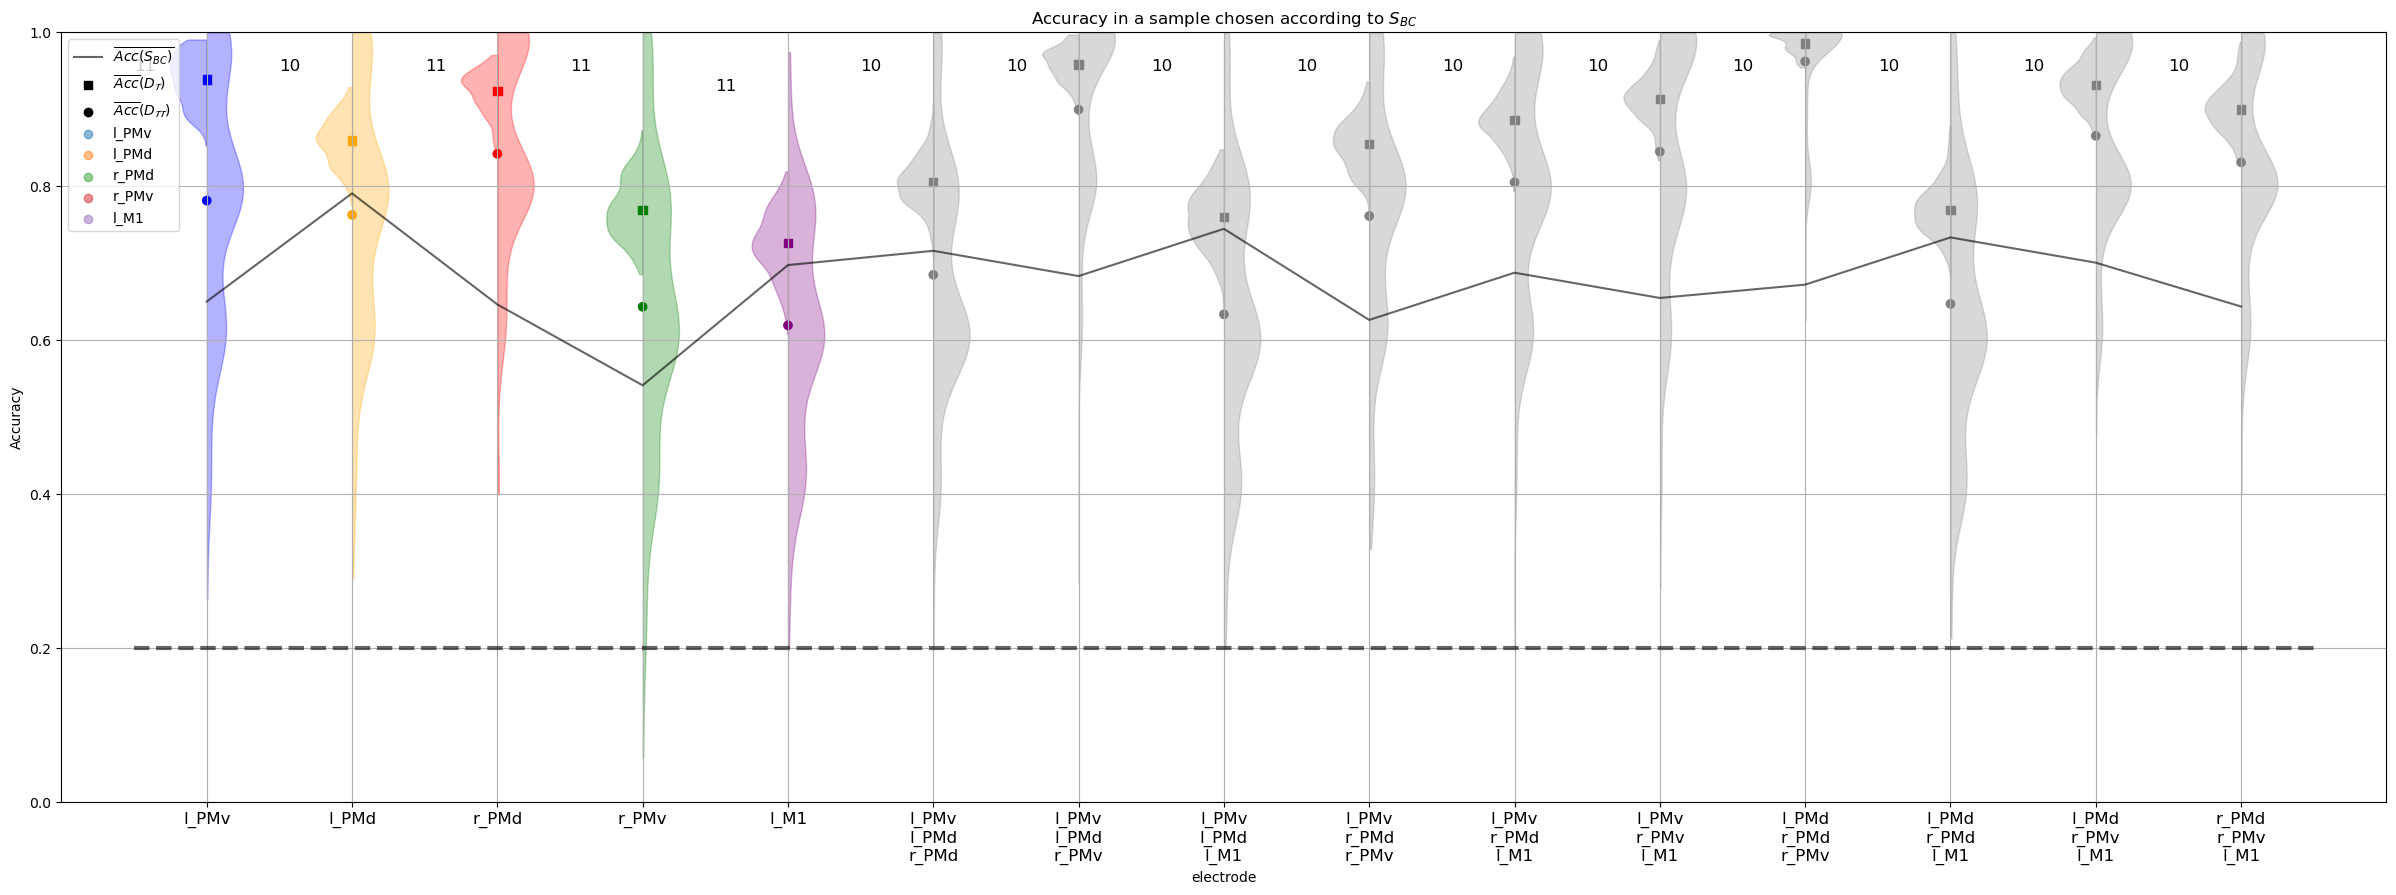

In [90]:
fig, axs = plt.subplots(1,1,figsize=(30,10))
from scipy.stats import mannwhitneyu
n_violins = 15
violinsP = axs.violinplot(prec.T,showextrema=False)
counter = 0
for vP in violinsP['bodies']:
    vP.set_color(colors[counter])
    m = np.mean(vP.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    vP.get_paths()[0].vertices[:, 0] = np.clip(vP.get_paths()[0].vertices[:, 0], -np.inf, m)
    counter+=1

# counter = 0
# for partname in ('cbars'):
#     vp = violinsP[partname]
#     vp.set_edgecolor(colors)
#     vp.set_linewidth(1)
#     counter+=1

violins = axs.violinplot(acc.T,showextrema=False)
counter = 0
for v in violins['bodies']:
    v.set_color(colors[counter])
    m = np.mean(v.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    v.get_paths()[0].vertices[:, 0] = np.clip(v.get_paths()[0].vertices[:, 0], m, np.inf)
    counter+=1

# counter = 0
# for partname in ('cbars','cmins','cmaxes'):
#     vp = violins[partname]
#     vp.set_edgecolor(colors)
#     vp.set_linewidth(1)
#     counter+=1

axs.set_xticks(np.arange(n_violins)+1,options.astype(str), fontsize=12)
axs.set_xlabel('electrode')
axs.set_ylabel(r'Accuracy')
# ax2 = axs.twinx()
# ax2.set_ylim((0,1))
axs.plot(np.arange(n_violins)+1,S_BC, label =r'$\overline{Acc({S_{BC}})}$', c= 'black', alpha=.6)
axs.scatter(np.arange(n_violins)+1,np.mean(prec,axis=1), c= colors, marker="s")
axs.scatter(np.arange(n_violins)+1,np.mean(acc,axis=1), c= colors)
axs.scatter([-2],[3], label =r'$\overline{Acc}(D_{\mathcal{T}})$', c= 'black', marker="s")
axs.scatter([-2],[3], label =r'$\overline{Acc}(D_{\mathcal{TT}})$', c= 'black')
axs.set_ylim((0,1))
axs.plot([0.5,n_violins+0.5],[0.2,0.2], ls='dashed', c='black', lw=3, alpha=.6)
axs.set_xlim((0,n_violins+1))
U1, p = mannwhitneyu(np.array(acc), np.array(np.zeros((n_violins,100)))+0.2,axis=1)
for f in range(n_violins):
    if(p[f]>0.05):
        axs.text(f+0.5,np.min(acc[f])+0.05, "{:.2f}".format(p[f]),fontsize=12)

for f in range(n_violins):
    axs.text(f+0.5,np.max(acc[f])-0.05, "{:d}".format(int(np.max(orders[f]))),fontsize=12)
for i in ['l_PMv', 'l_PMd', 'r_PMd', 'r_PMv', 'l_M1']:
    axs.scatter([-3],[2], alpha =.5, label=i)
axs.set_xticks(range(1,16),TICKS_labels)
plt.legend(loc='upper left', fontsize=10)
axs.set_title(r'Accuracy in a sample chosen according to $S_{BC}$')
plt.grid()
plt.savefig('Acc_electrode_15_VAR.pdf')

This is the performance of terms of precision (accuracy in Trainingset, left violin plot) and accuracy (right violin plot)  of the Multinomial Logistic Regression on the VAR(p) matrices characterising High-Frequency LFP-recordings in different stages (5) of a motor-cognitive task performed by Non-Human Primates. THe solid line depicts the scoring value of that model (the reason why those channels were selected) and the dashed line the chance level. The integer is the order of the model

# RFE

#### Run Only first time

In [ ]:
gacc=[]
gprec=[]
grel_feat=[]
feat=[]
for counter, channels in enumerate(options):
    order = orders[counter]
    p0=order
    n_features = len(channels)*len(channels)*order+len(channels)
        if p0>n_features > 50: 
            obj_features=np.concatenate((np.arange(1,10),np.arange(10,n_features,10))).astype(int) #multi-channel model
        else:
            obj_features=np.concatenate((np.arange(1,10),np.arange(10,n_features,2))).astype(int) #single-channel model
    code = 'order'+str(p0)+'_channels'
    code += "_" + "_".join(np.array(channels).astype(str)
    gacc.append(np.load('RFEacc'+code+'.npy'))
    gprec.append(np.load('RFEprec'+code+'.npy'))
    grel_feat.append(np.load('RFEoptimal_features'+code+'.npy'))
    feat.append(obj_features)

In [70]:
gacc = np.array(gacc, dtype = object)
gprec = np.array(prec, dtype = object)
#grel_feat = np.array(grel_feat, dtype = object)
feat = np.array(feat, dtype=object)

np.save('gaccRFE.npy', gacc)
np.save('gprecRFE.npy',gprec)
import pickle

# Save grel_feat using pickle
with open('grel_feat.pkl', 'wb') as f:
    pickle.dump(grel_feat, f)
np.save('feat_RFE.npy', feat)

#### Continue

In [98]:
gacc = np.load('gaccRFE.npy', allow_pickle=True)
gprec = np.load('gprecRFE.npy', allow_pickle=True)
import pickle
with open('grel_feat.pkl', 'rb') as f:
    grel_feat = pickle.load(f)
feat = np.load('feat_RFE.npy', allow_pickle=True)

In [106]:
valid_channels=range(len(options))

In [107]:
opt = np.zeros(len(options))
frac_opt = np.zeros(len(options))
ind_opt = np.zeros(len(options))
elec=np.zeros(len(options))
for i in range(len(options)):
    acc = np.mean(gacc[i], axis = 1)
    print(len(acc))
    print(len(np.array(feat[i]).flatten()))
    print(np.argmax(acc))
    print('------------')
    if np.max(acc)>0.25:
        elec[i] = 1
    opt[i] = np.array(feat[i]).flatten()[np.argmax(acc)]
    opt[i] = len(acc)-1
    ind_opt[i] = np.argmax(acc)
    frac_opt[i] = opt[i]/len(np.array(feat[i]).flatten())
    if opt[i] == len(acc)-1:
        c = 0
        print('im in', i)
        for j in range(len(gacc[i])):
            if acc[j]-acc[0] >0.8*(acc[len(acc)-1]-acc[0]) and c == 0:
                print(j)
                opt[i] = np.array(feat[i]).flatten()[j]
                print(ind_opt)
                frac_opt[i] = opt[i]/len(np.array(feat[i]).flatten())
                ind_opt[i] = j
                c += 1


19
28
13
------------
im in 0
5
[13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
18
26
2
------------
im in 1
1
[5. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19
28
1
------------
im in 2
1
[5. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19
28
18
------------
im in 3
4
[ 5.  1.  1. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
19
28
8
------------
im in 4
3
[5. 1. 1. 4. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18
26
1
------------
im in 5
1
[5. 1. 1. 4. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18
26
7
------------
im in 6
1
[5. 1. 1. 4. 3. 1. 7. 0. 0. 0. 0. 0. 0. 0. 0.]
18
26
4
------------
im in 7
1
[5. 1. 1. 4. 3. 1. 1. 4. 0. 0. 0. 0. 0. 0. 0.]
18
26
3
------------
im in 8
1
[5. 1. 1. 4. 3. 1. 1. 1. 3. 0. 0. 0. 0. 0. 0.]
18
26
6
------------
im in 9
3
[5. 1. 1. 4. 3. 1. 1. 1. 1. 6. 0. 0. 0. 0. 0.]
18
26
5
------------
im in 10
3
[5. 1. 1. 4. 3. 1. 1. 1. 1. 3. 5. 0. 0. 0. 0.]
18
26
8
------------
im in 11
2
[5. 1. 1. 4. 3. 1. 1. 1. 1. 3. 3. 8. 0. 0. 0.]
18
26
1
------------
im in 12


In [109]:
tr=0.3

In [110]:
valid_channels = []

for i in range(len(options)):
    if i%12 ==0:
        print('a')
    print(np.mean(gacc[i][int(ind_opt[i]),:]))
    if np.mean(gacc[i][int(ind_opt[i]),:]) > tr:
        valid_channels.append(i)
valid_channels = np.array(valid_channels).astype(int) 

a
0.7517419354838709
0.7505806451612903
0.9089247311827957
0.6310107526881721
0.6201075268817204
0.7421075268817204
0.884731182795699
0.7176344086021506
0.7455913978494623
0.7635698924731182
0.8276129032258064
0.9604731182795698
a
0.7424086021505377
0.8829892473118279
0.8144301075268817


In [111]:
np.shape(grel_feat[0][int(ind_opt[0]),:,:])
siz = np.shape(grel_feat[0][int(ind_opt[0]),:,:])[1]
cv = np.zeros(siz)

for i in range(siz):
    for t in range(300):
        if grel_feat[0][int(ind_opt[0]),t,i] >-1:
            cv[int(grel_feat[0][int(ind_opt[0]),t,i])] += 1

In [482]:
def matrix(X,order):
    B=np.zeros((3,3*order+1))
    for i in range(3):
        B[i,0]=X[i]
    for ind in range(3,len(X)):
        ind-=3
        #print(ind%3,ind//3+1,X[ind+3])
        B[ind%3,ind//3+1]=X[ind+3]
    return B
def print_Matrix(X,order, axis,typep):
    M = matrix(X,orders[channel])
    colors=['coolwarm','Greens']
        # Display matrix with colormap
    im = axis.imshow(M, cmap=colors[typep])
    
    # Adding colorbar
    plt.colorbar(im, ax=axis,pad=0.01,shrink=.6)  # Add colorbar next to the axis
    xpos = np.hstack(([0],range(1,3*order+1,3)))-0.5
    #print(xpos)
    axis.vlines(xpos,[-0.5]*(order+1),[3-0.5]*(order+1),linewidth=6,color ='black')
    axis.set_xticks(np.hstack(([-1],range(1,3*order+1,3)))+1,range(order+1))
    return

In [485]:
TICKS2=[]
for i in range(5):
    TICKS2+=[[TICKS[i]]*3]
TICKS2 +=TICKS[5:]

In [486]:
TICKS2

[['l_PMv', 'l_PMv', 'l_PMv'],
 ['l_PMd', 'l_PMd', 'l_PMd'],
 ['r_PMd', 'r_PMd', 'r_PMd'],
 ['r_PMv', 'r_PMv', 'r_PMv'],
 ['l_M1', 'l_M1', 'l_M1'],
 ('l_PMv', 'l_PMd', 'r_PMd'),
 ('l_PMv', 'l_PMd', 'r_PMv'),
 ('l_PMv', 'l_PMd', 'l_M1'),
 ('l_PMv', 'r_PMd', 'r_PMv'),
 ('l_PMv', 'r_PMd', 'l_M1'),
 ('l_PMv', 'r_PMv', 'l_M1'),
 ('l_PMd', 'r_PMd', 'r_PMv'),
 ('l_PMd', 'r_PMd', 'l_M1'),
 ('l_PMd', 'r_PMv', 'l_M1'),
 ('r_PMd', 'r_PMv', 'l_M1')]

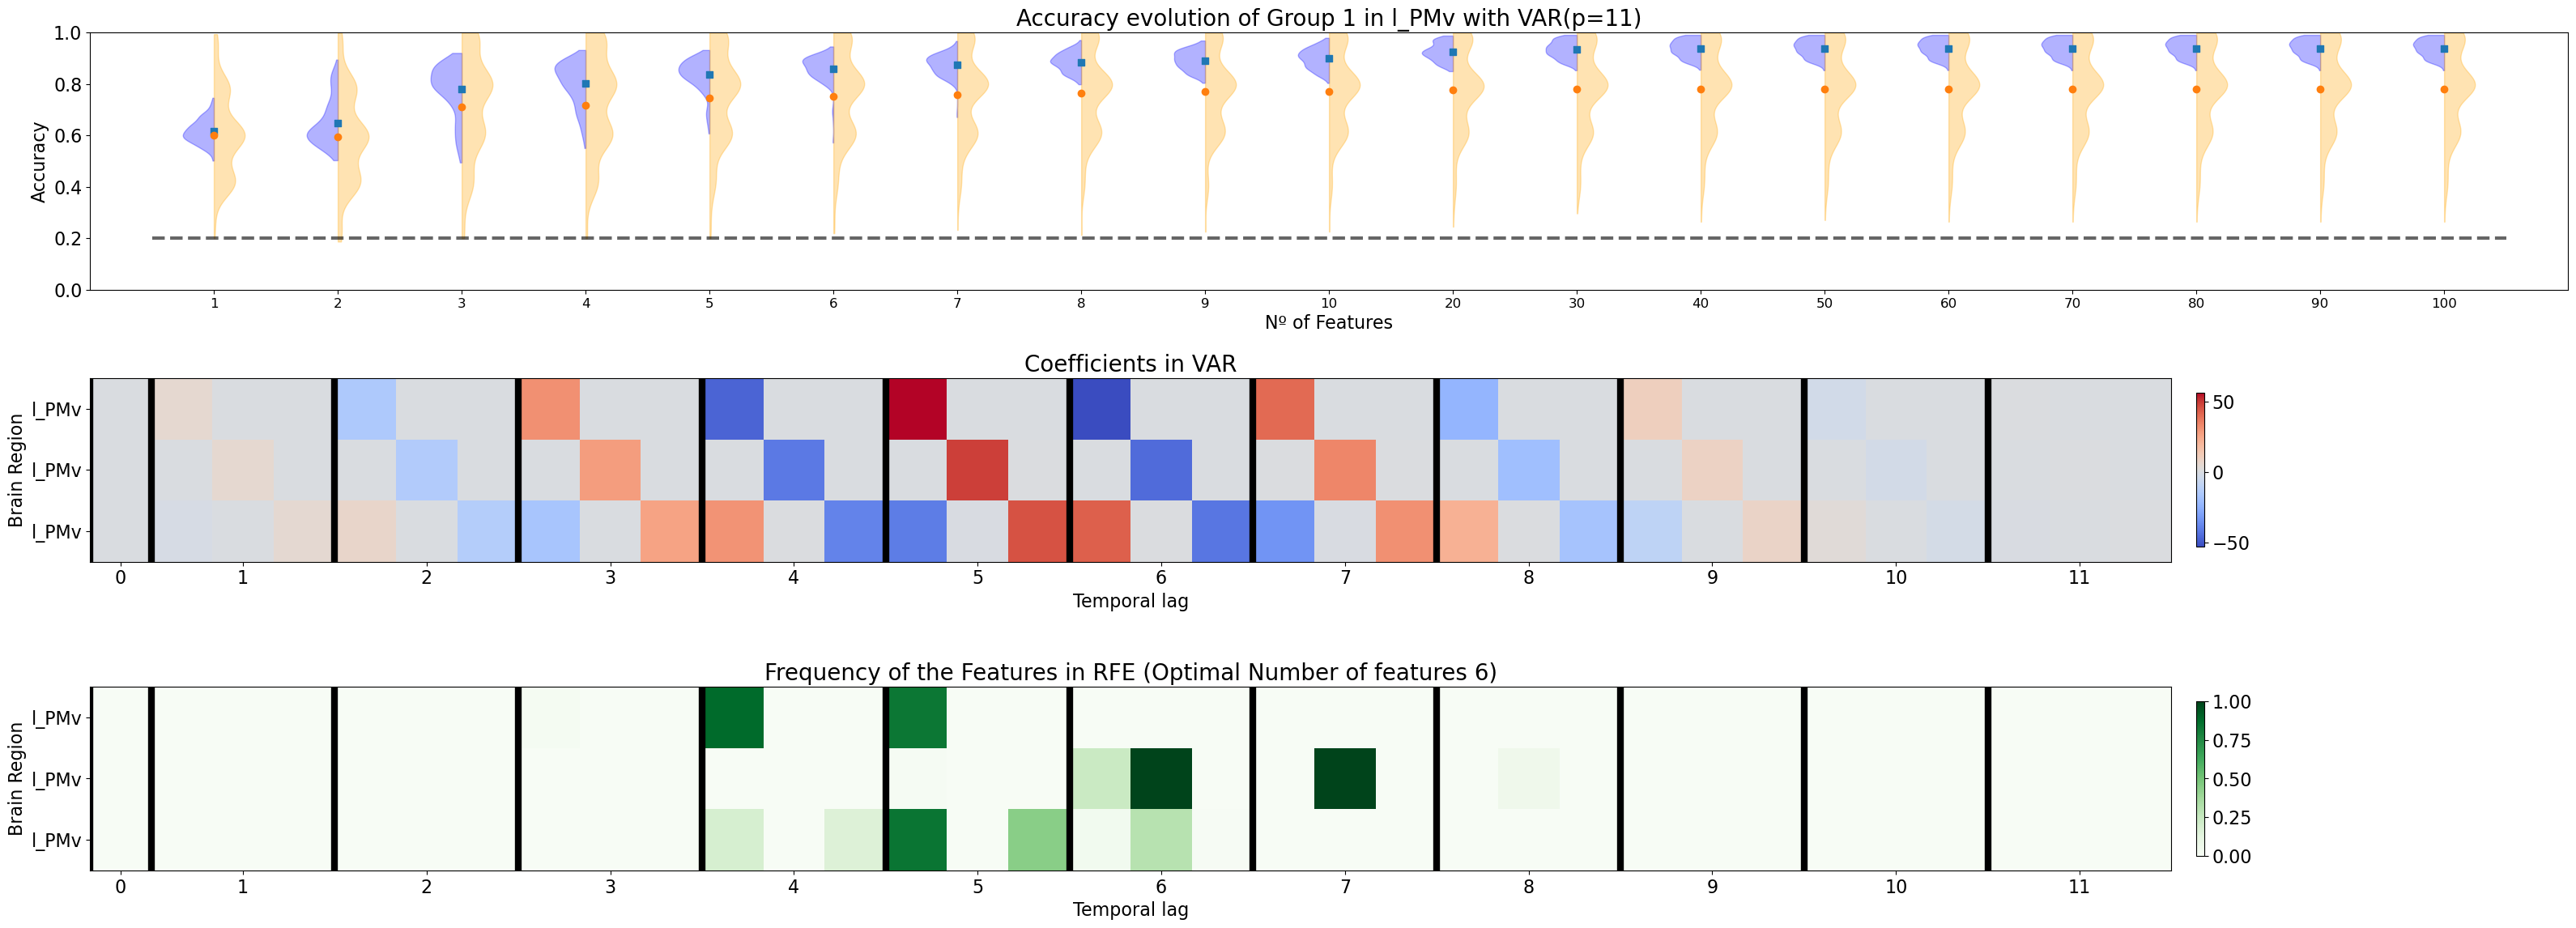

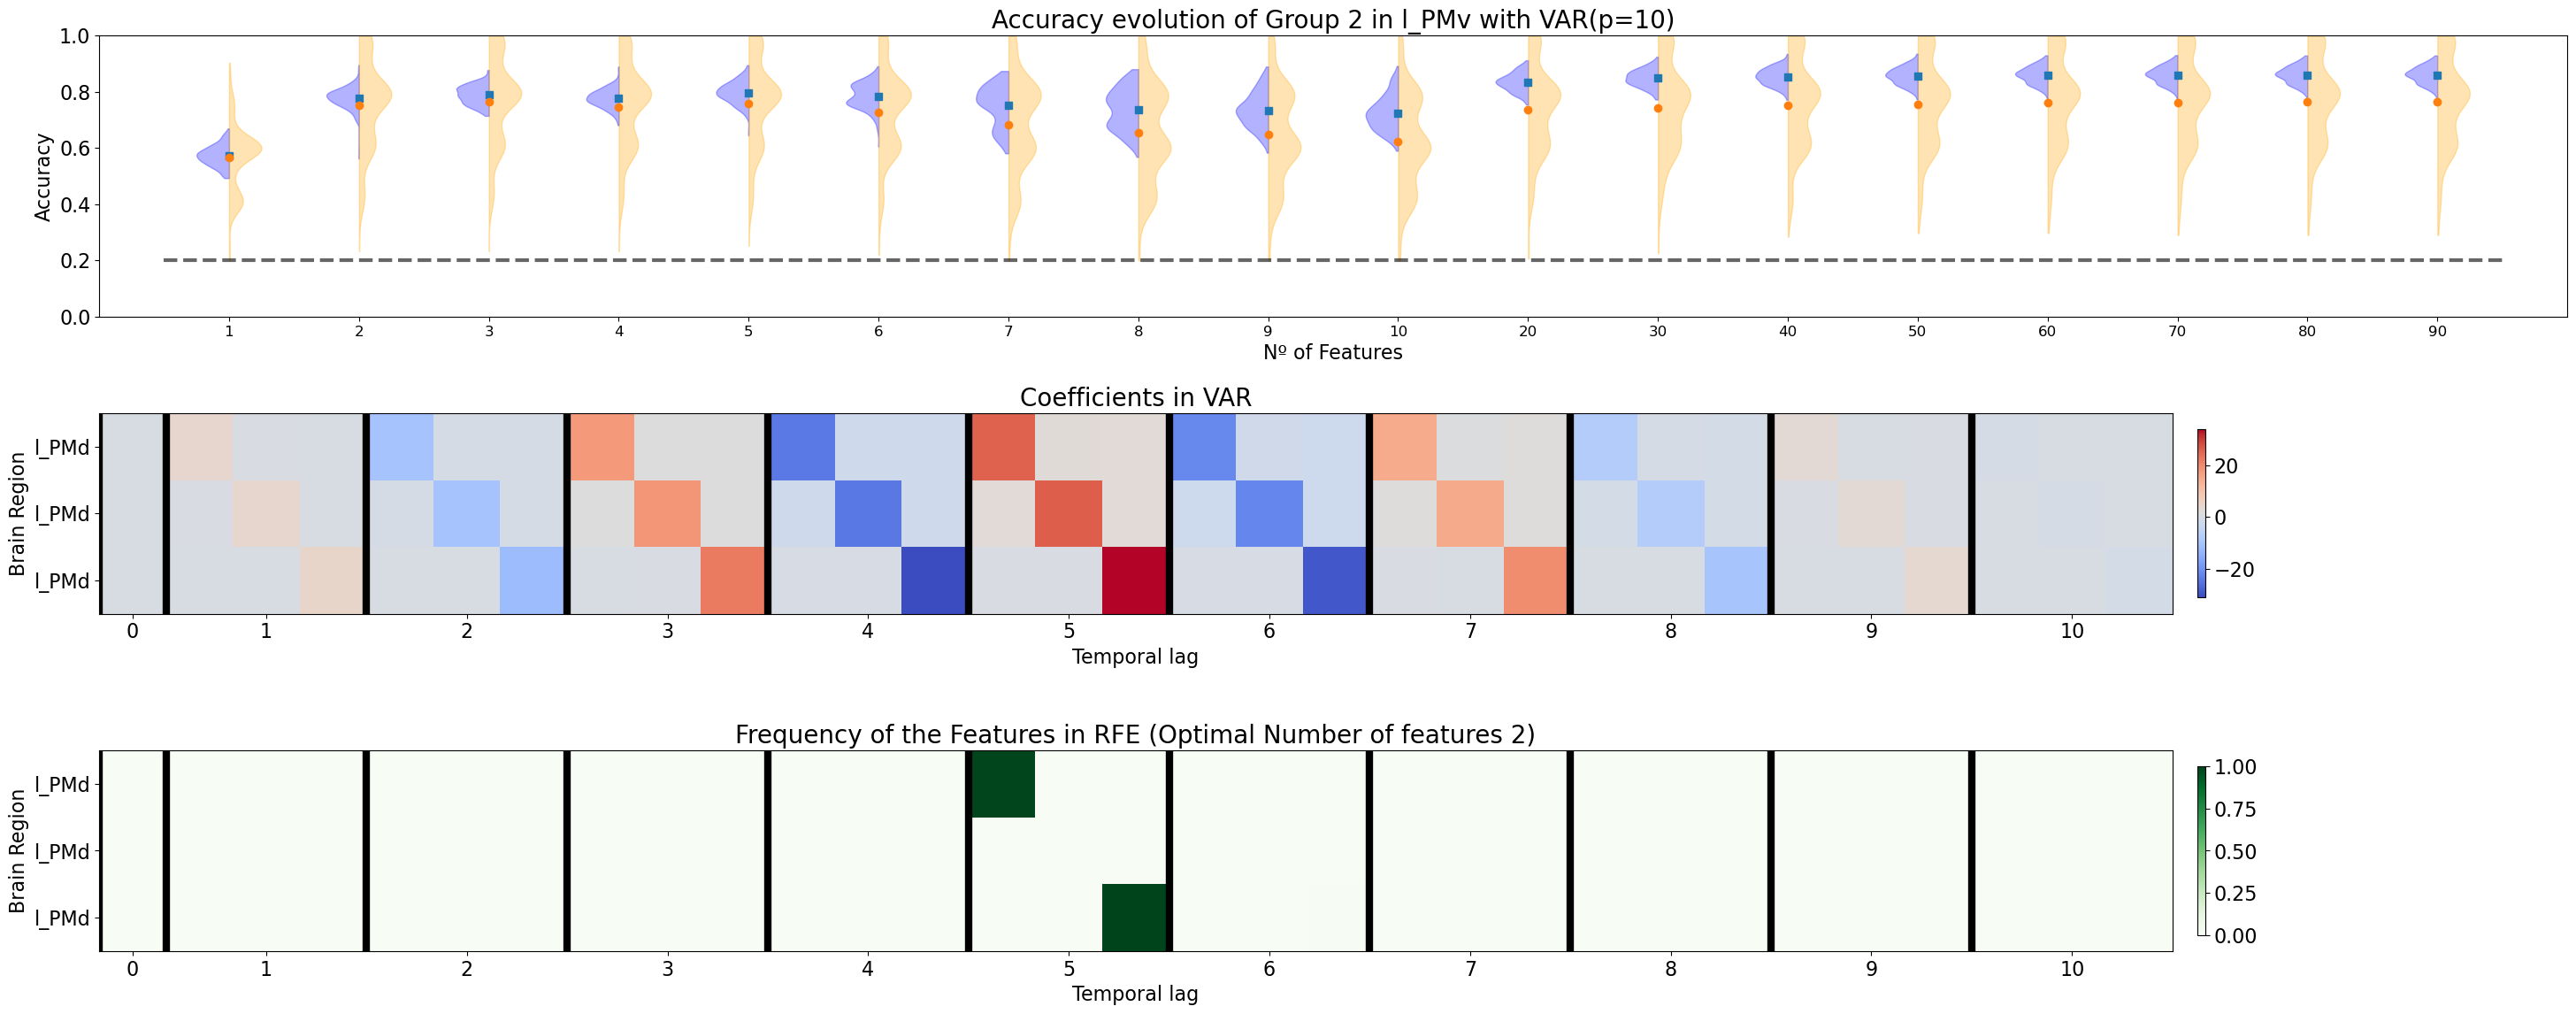

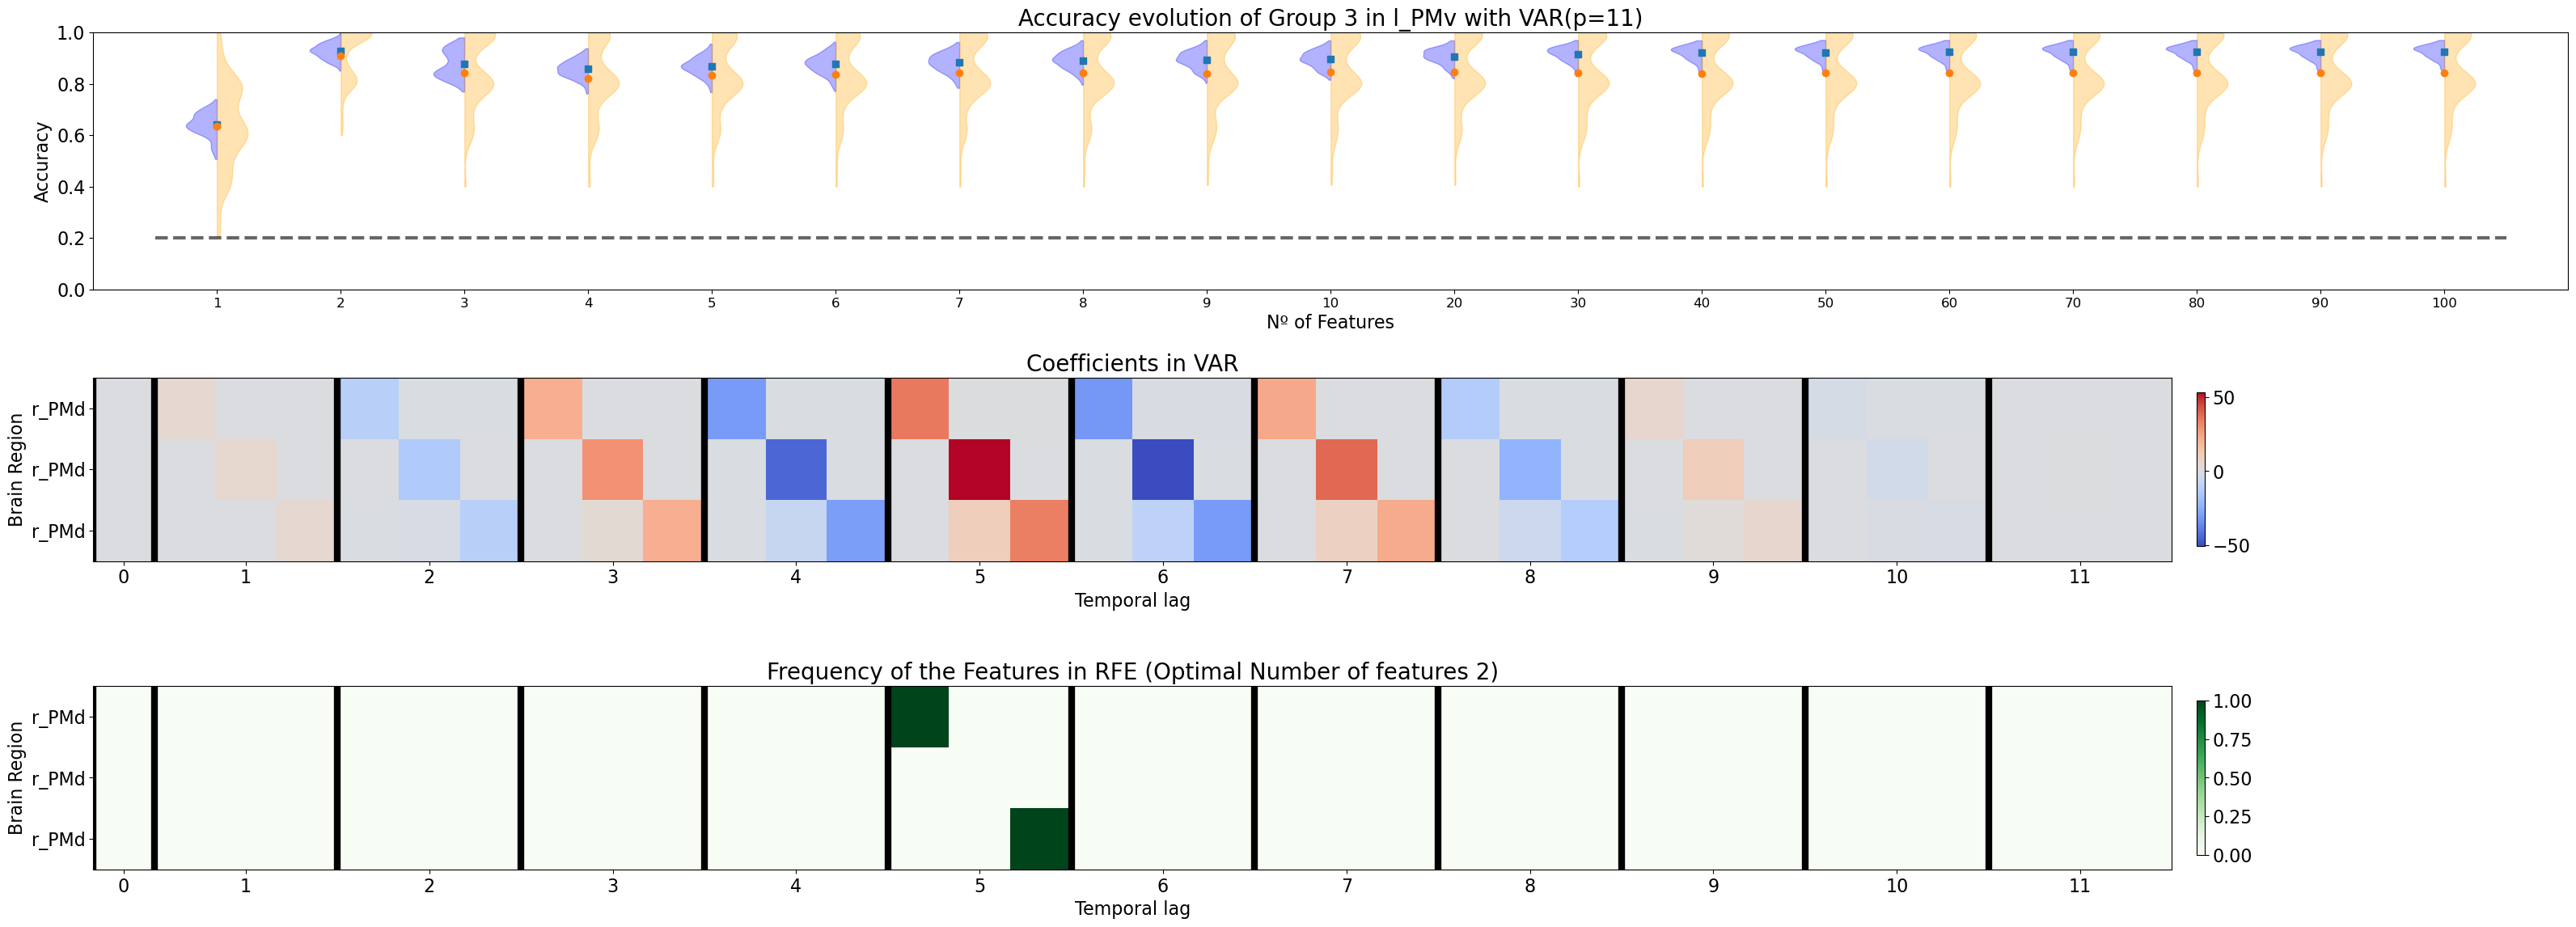

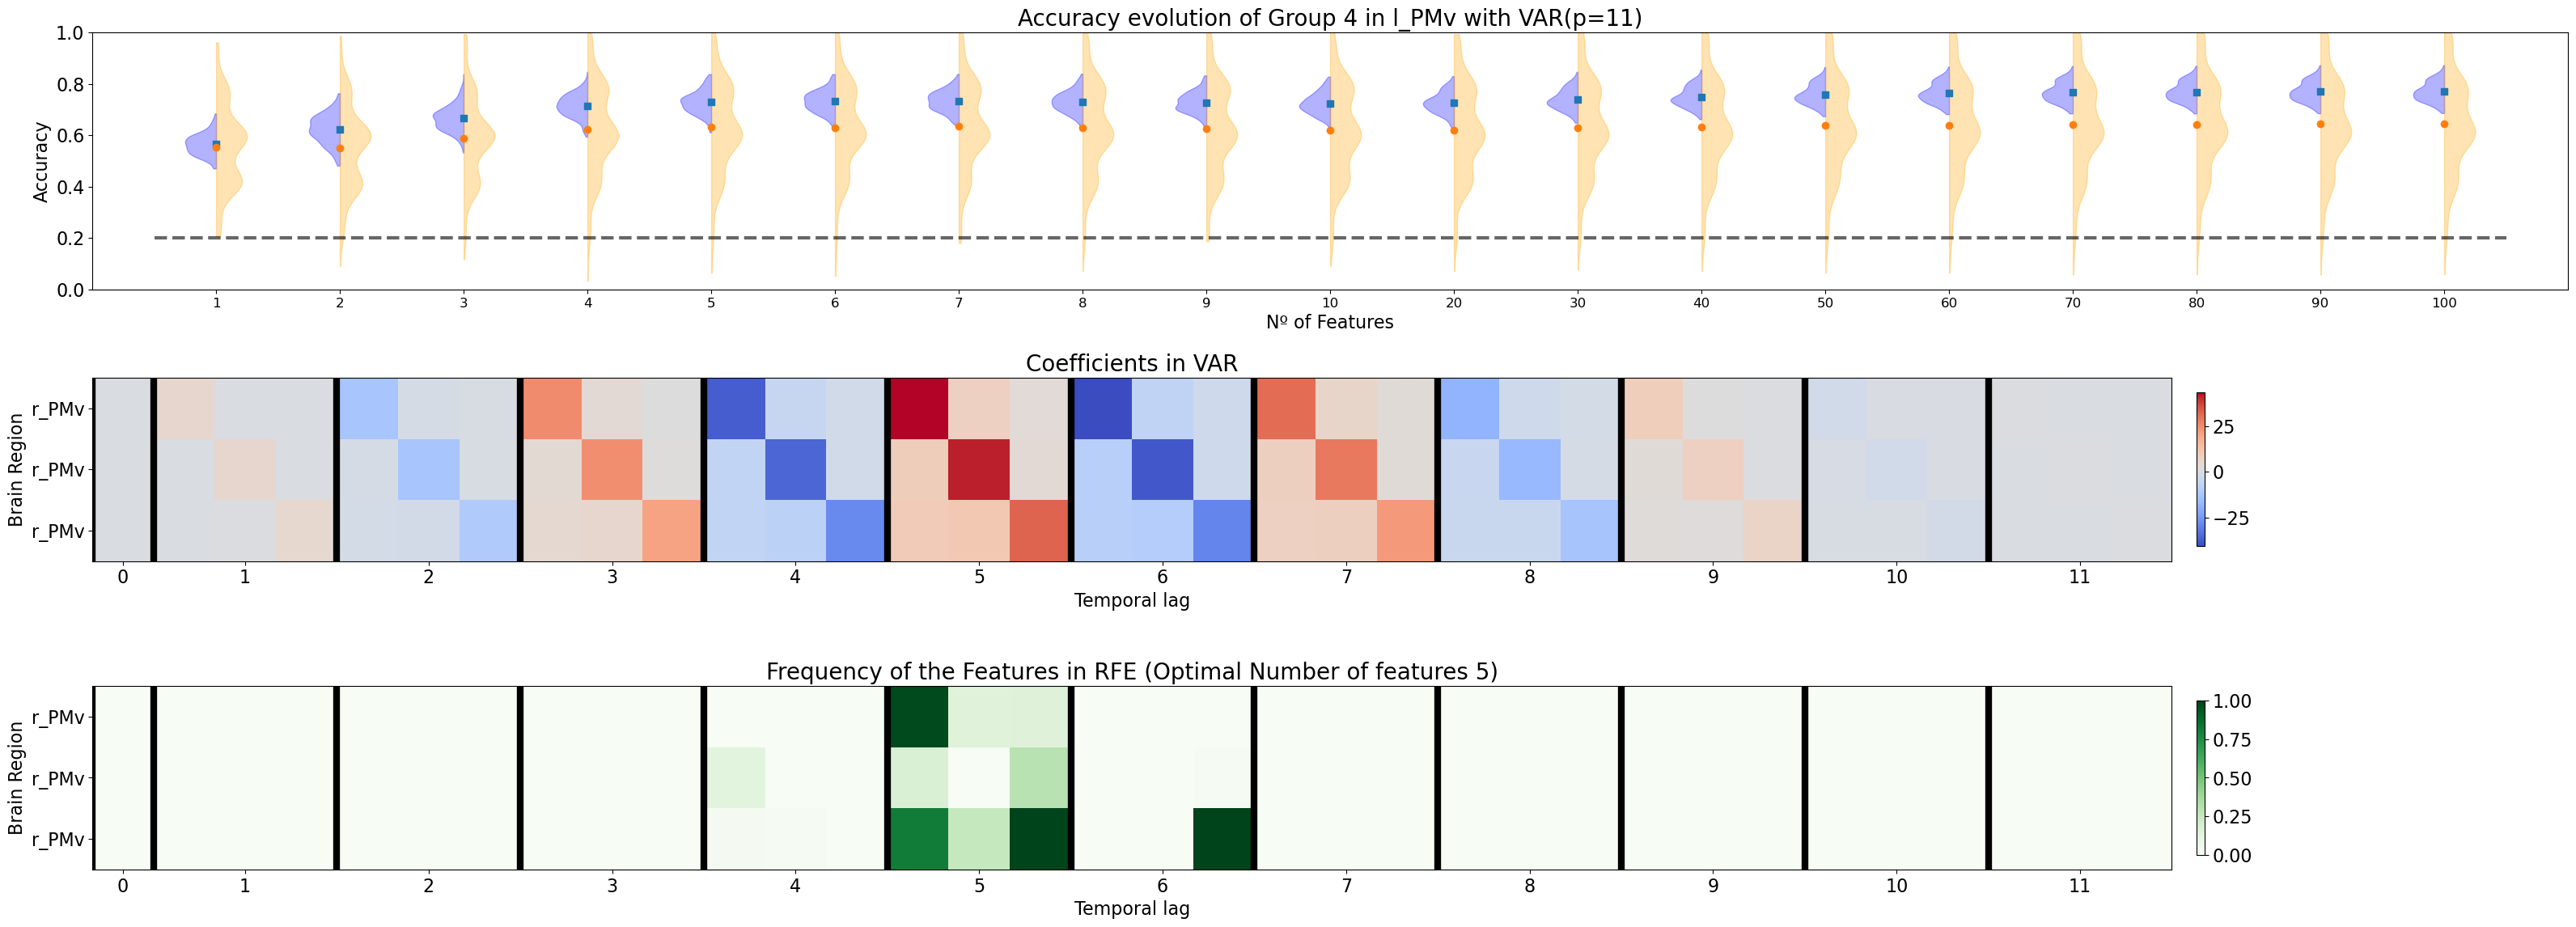

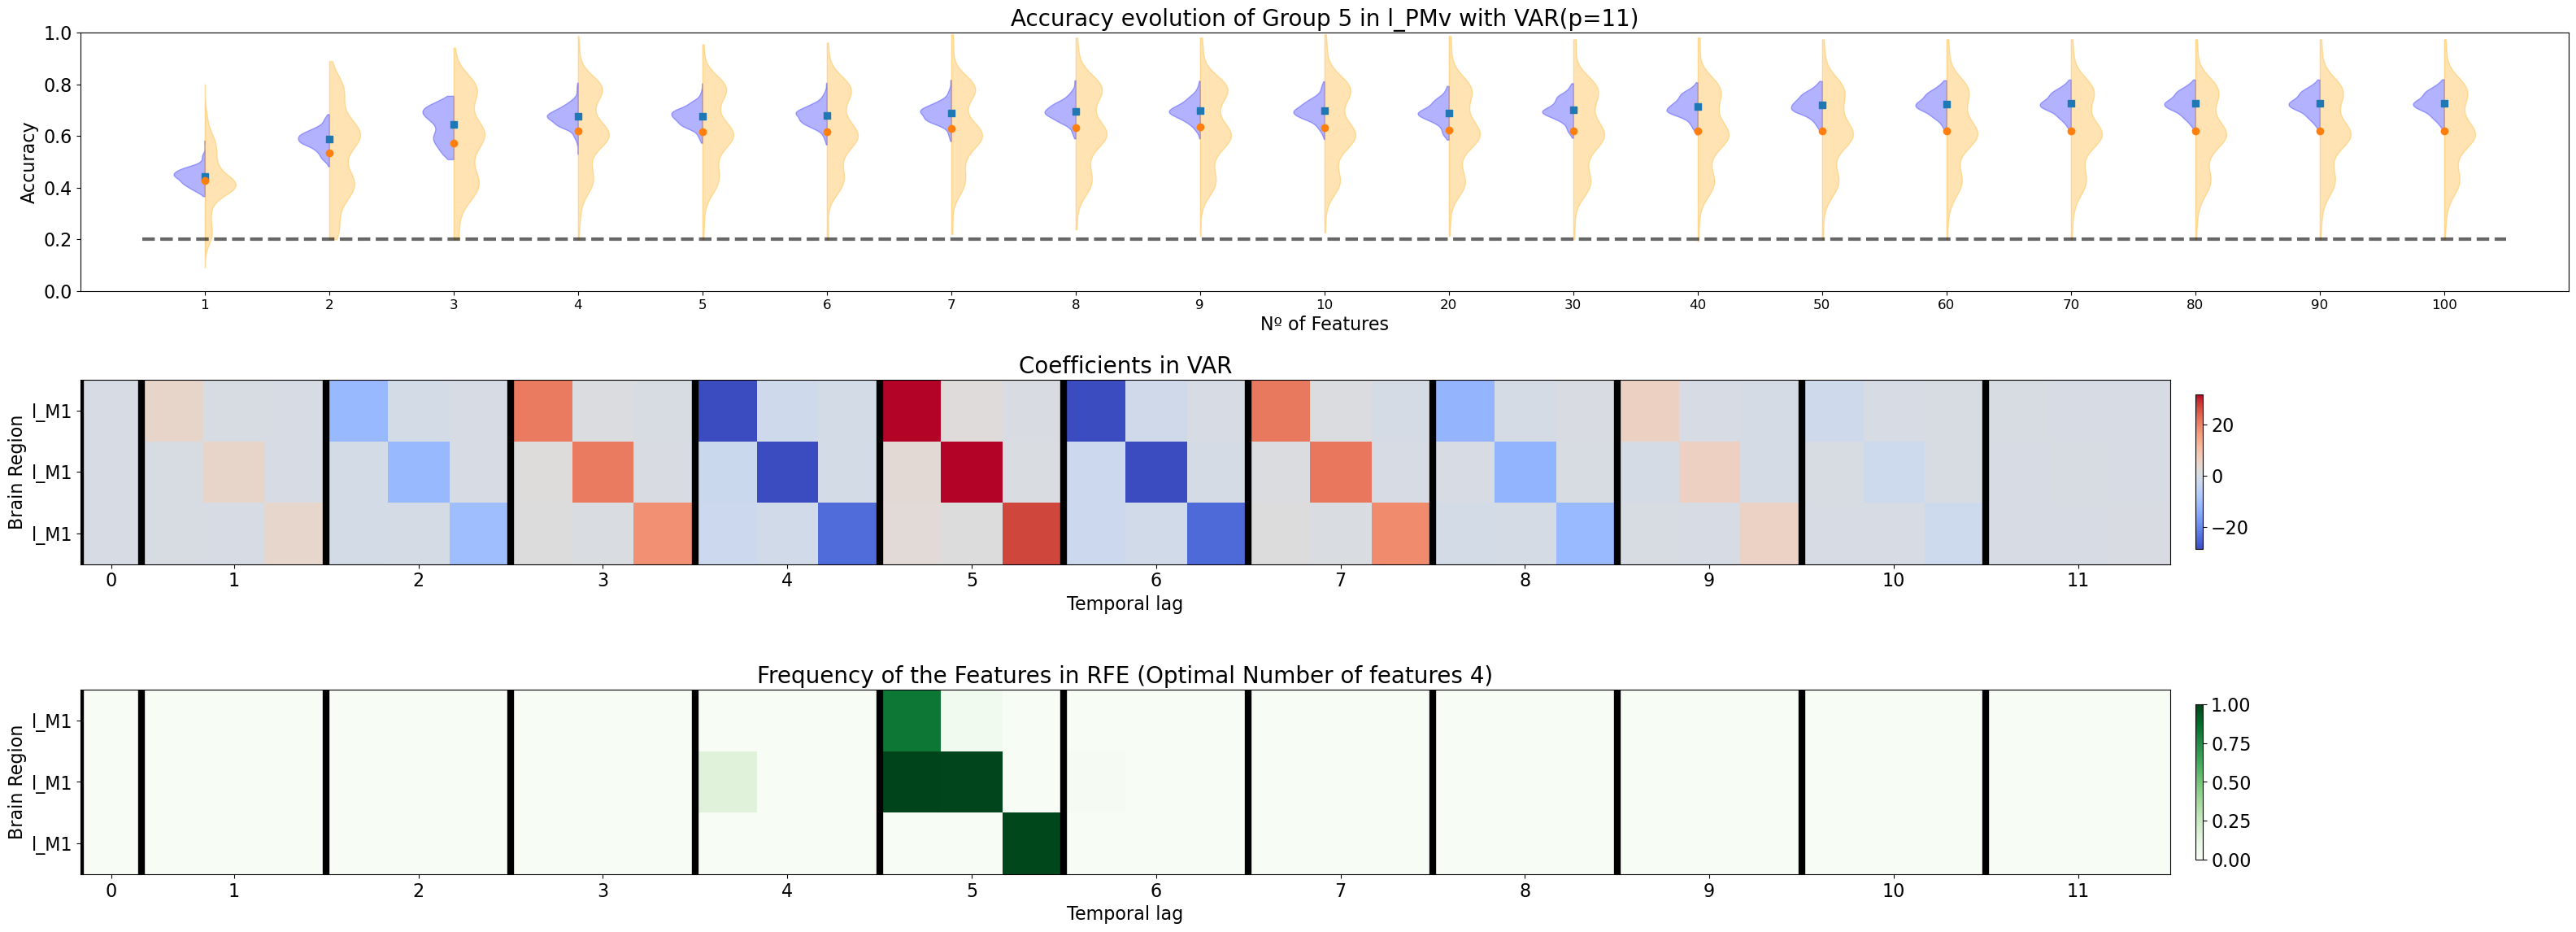

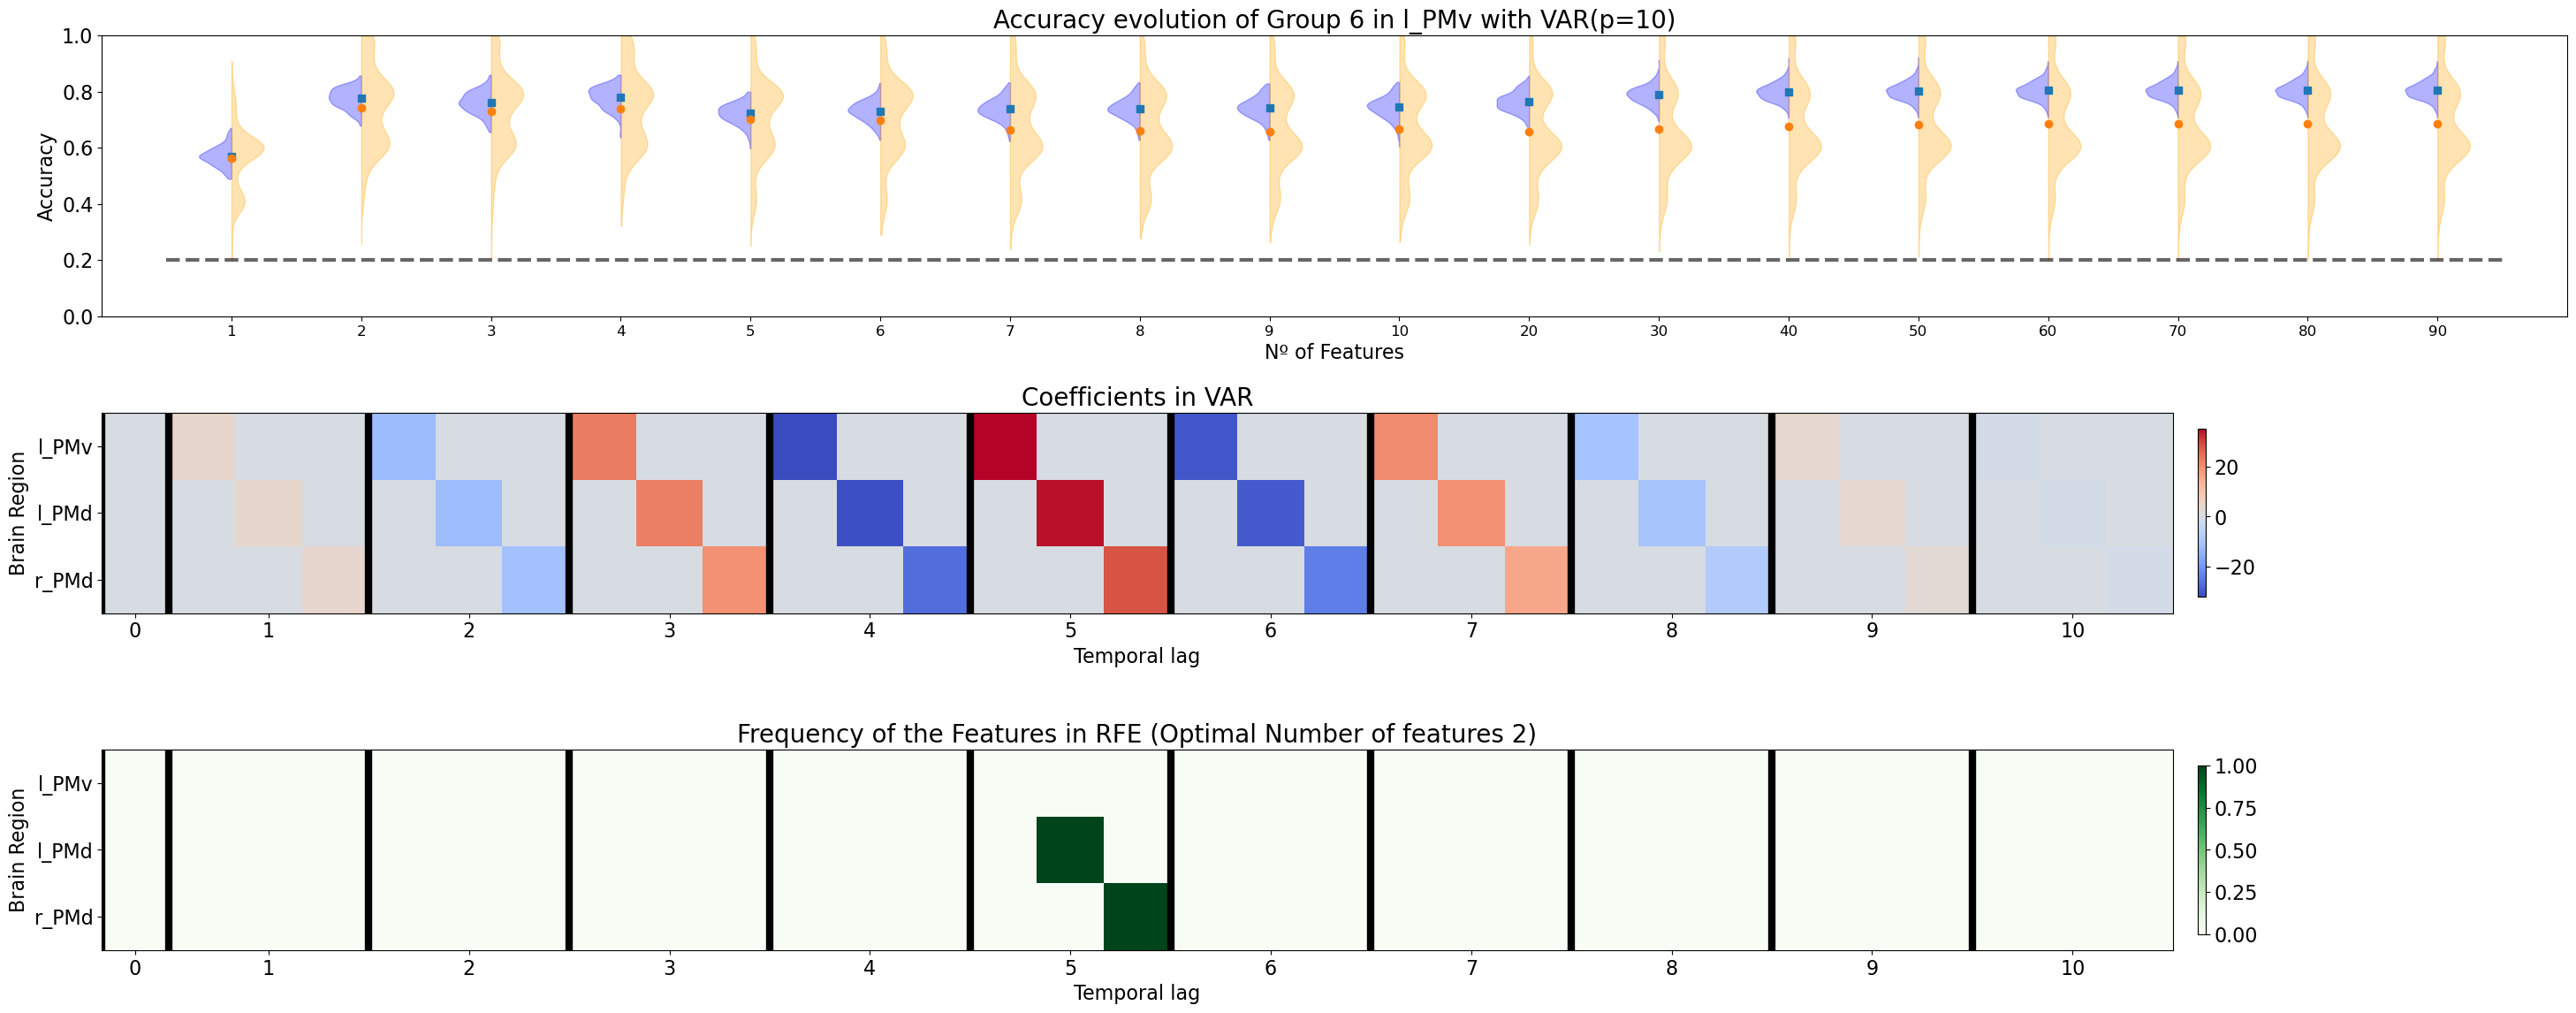

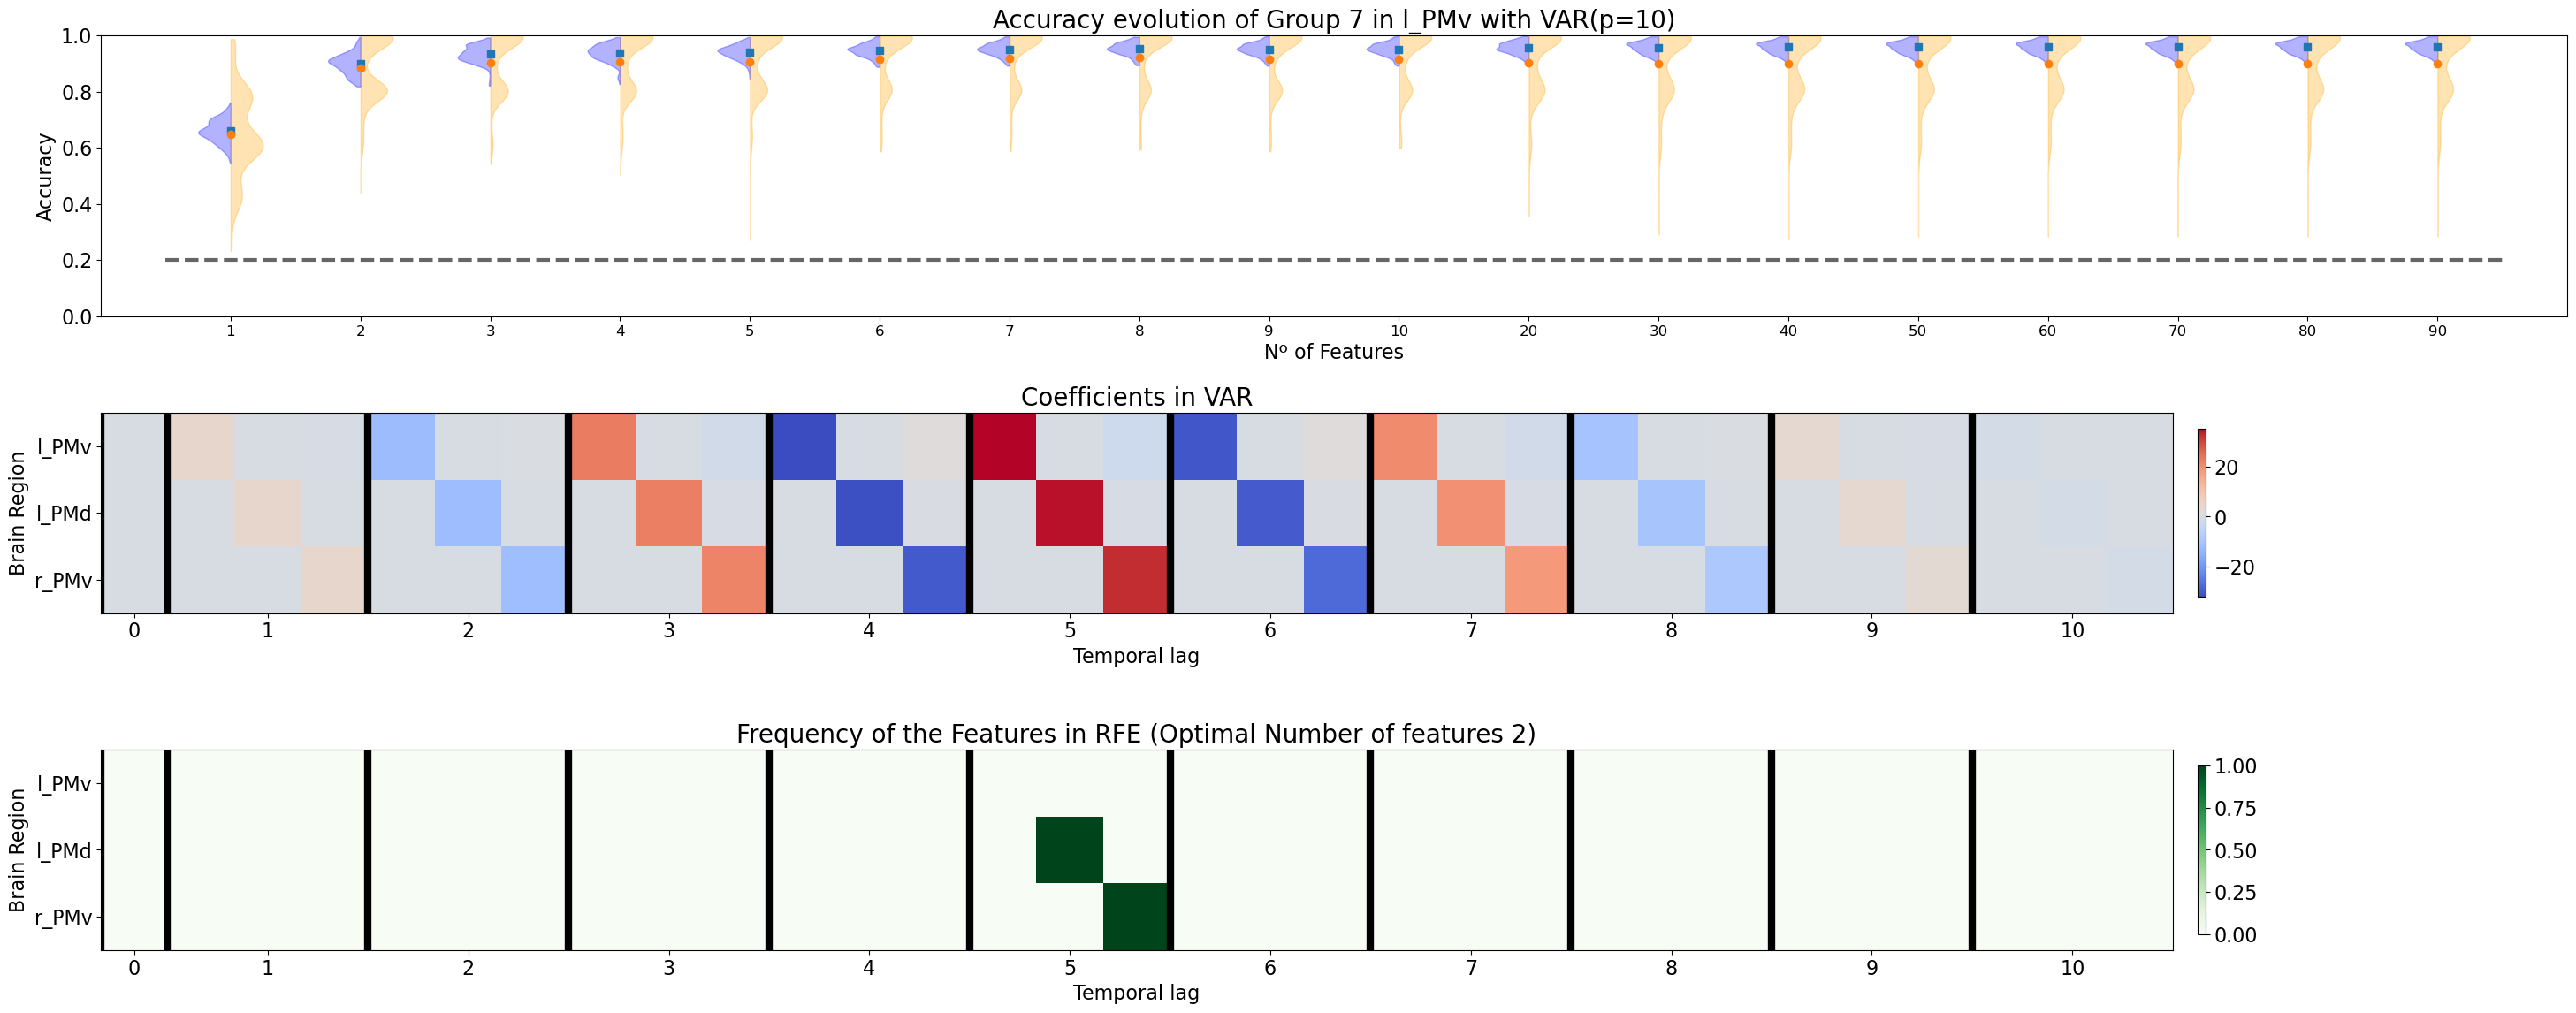

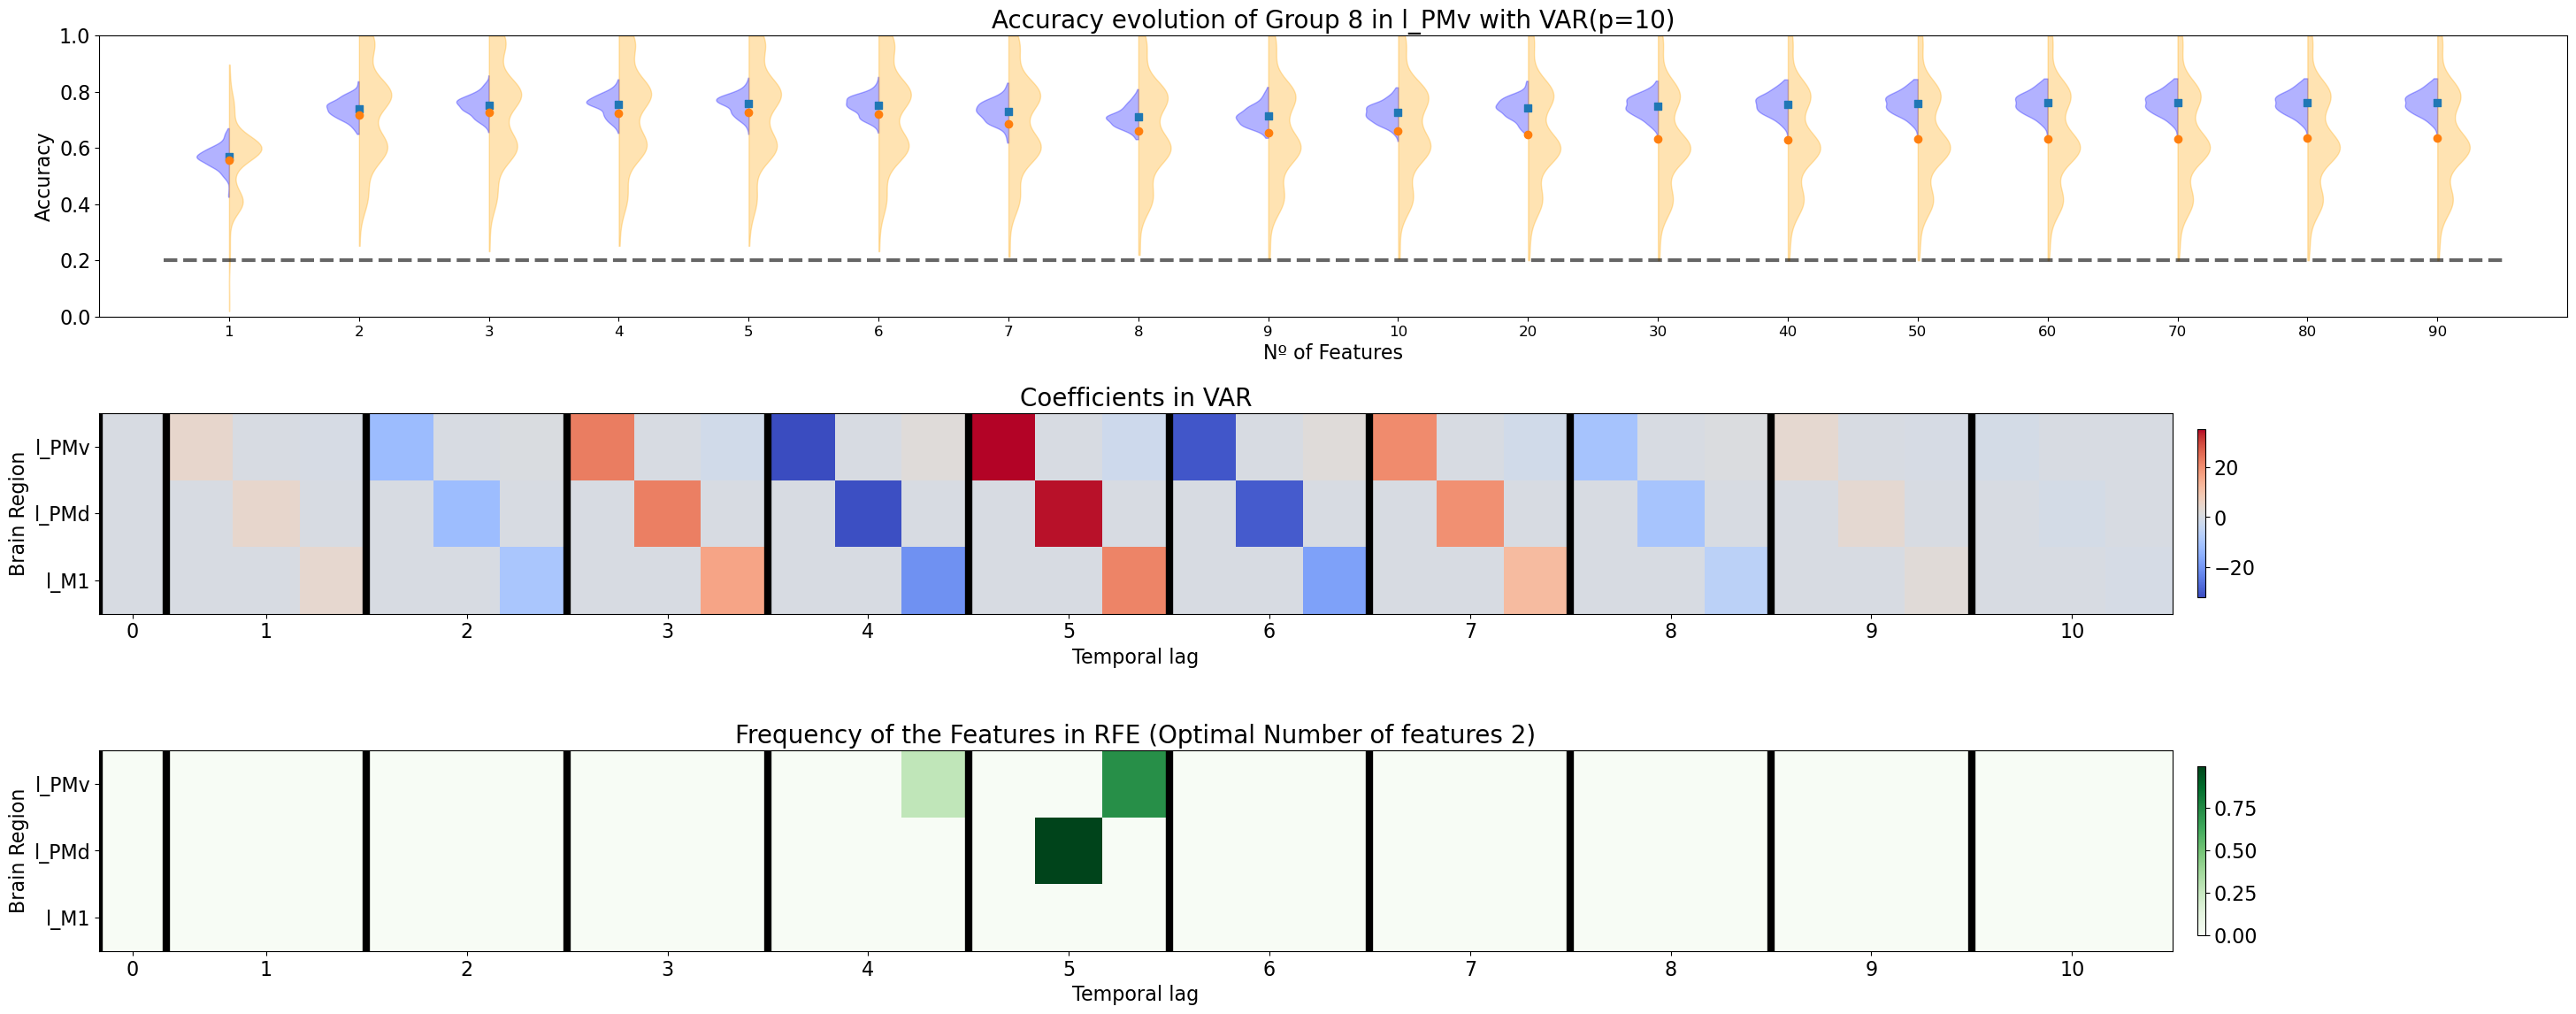

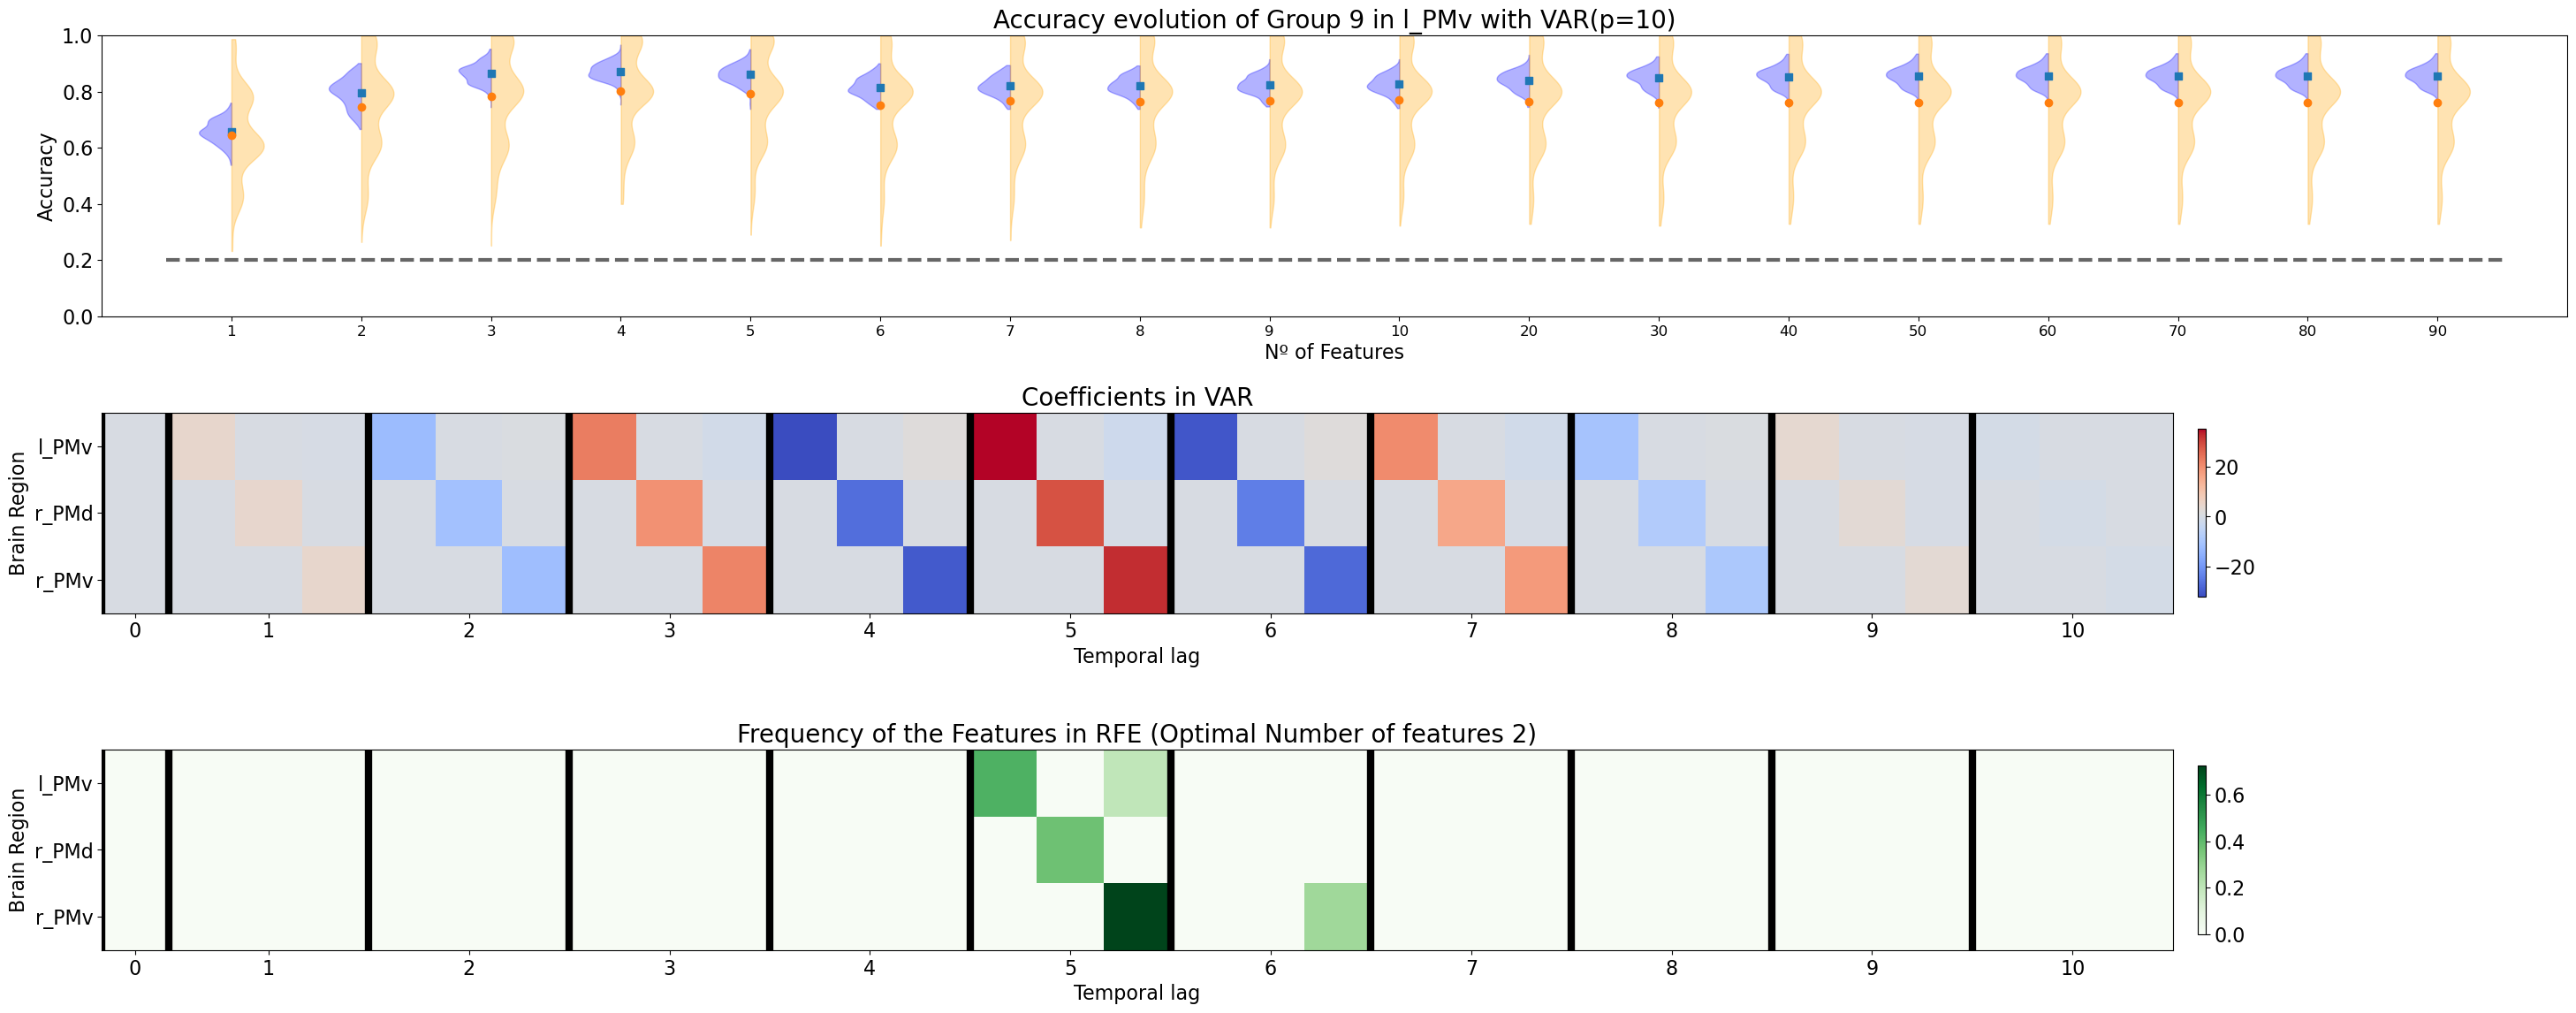

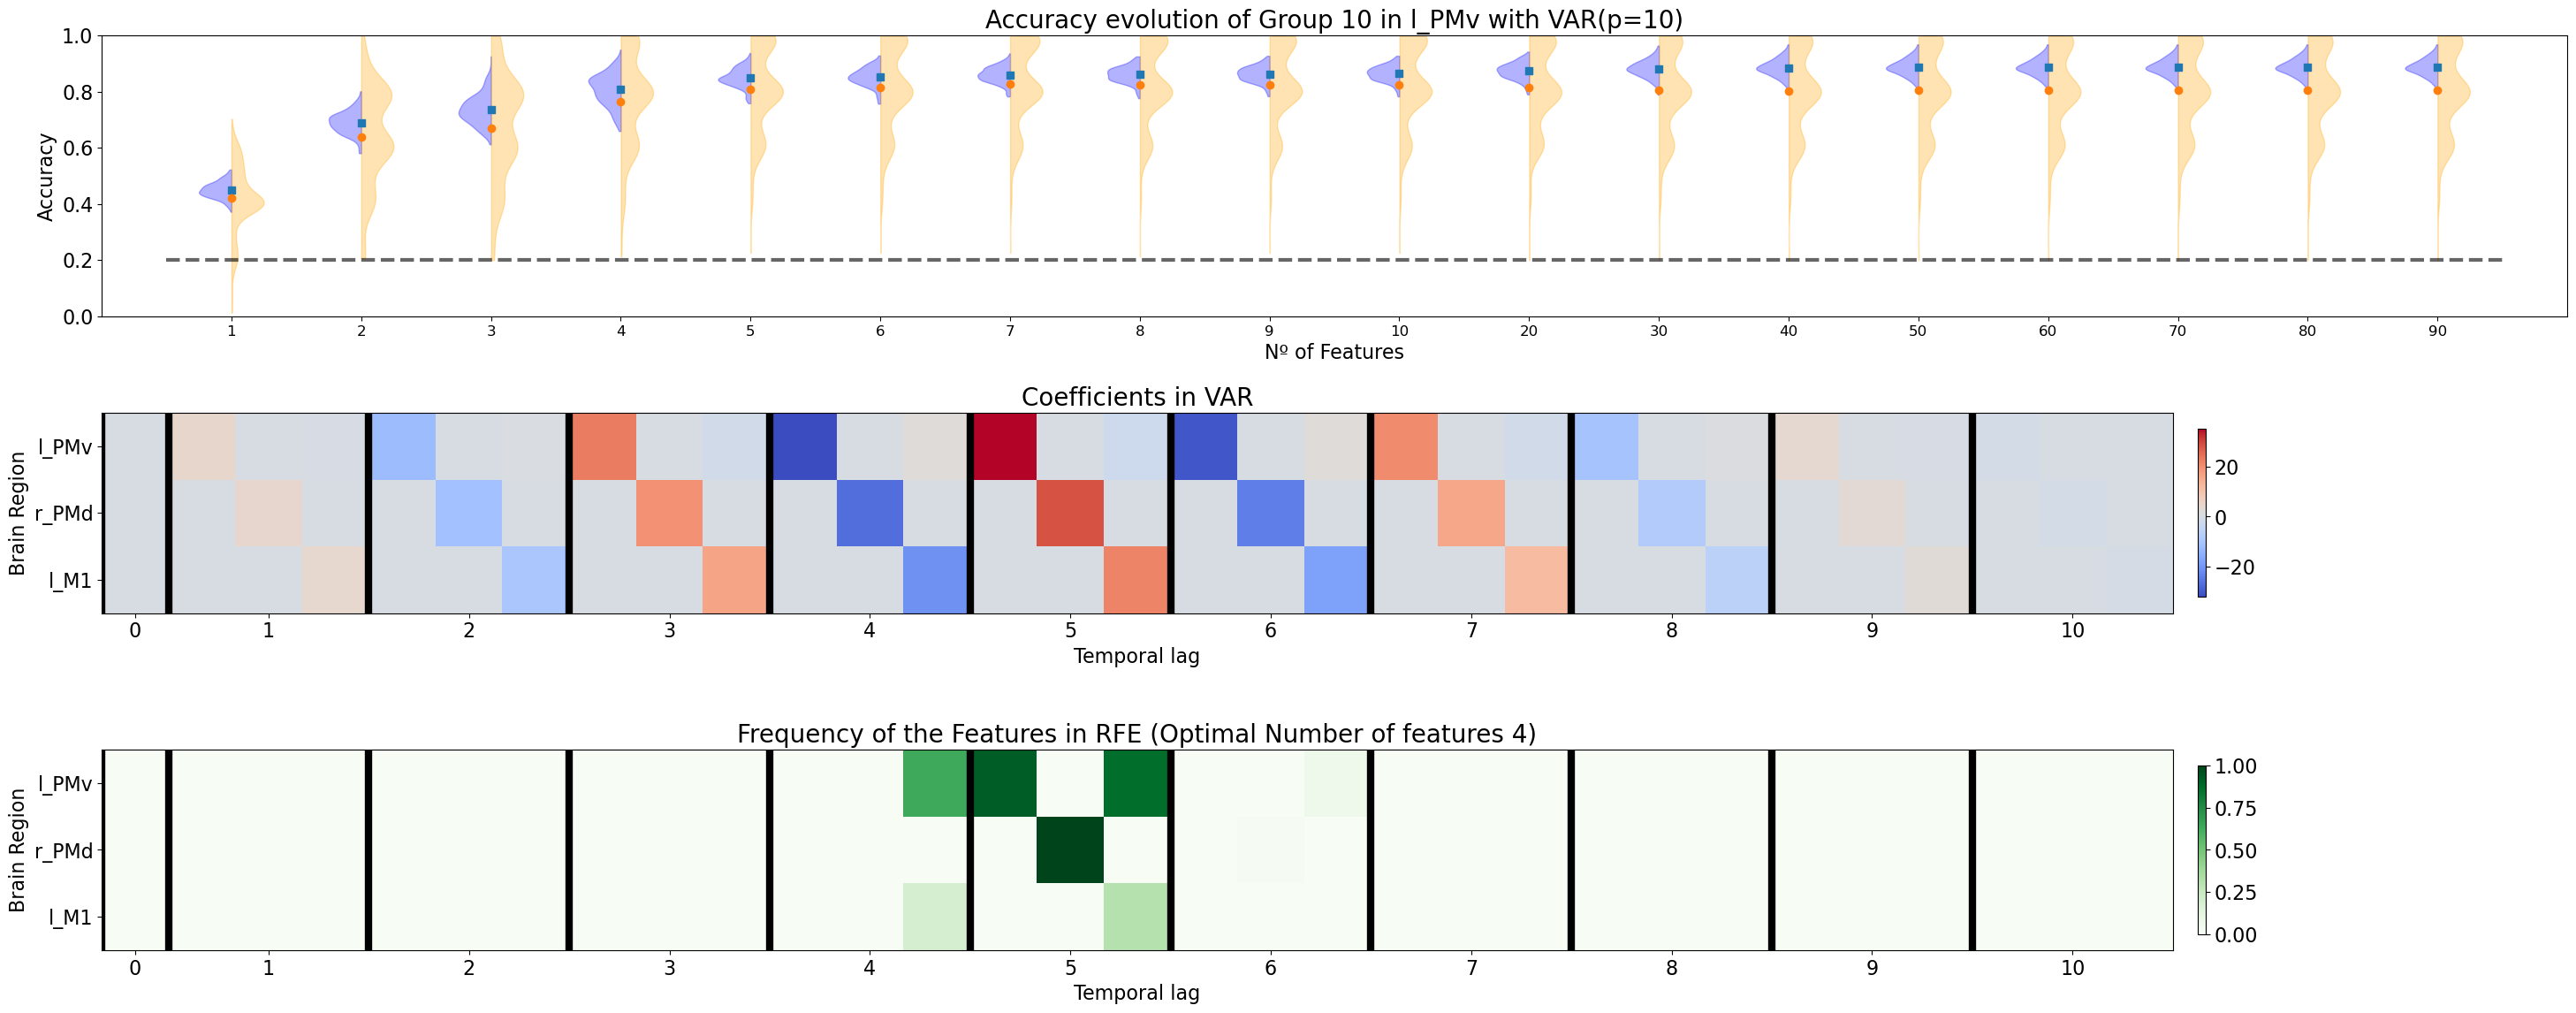

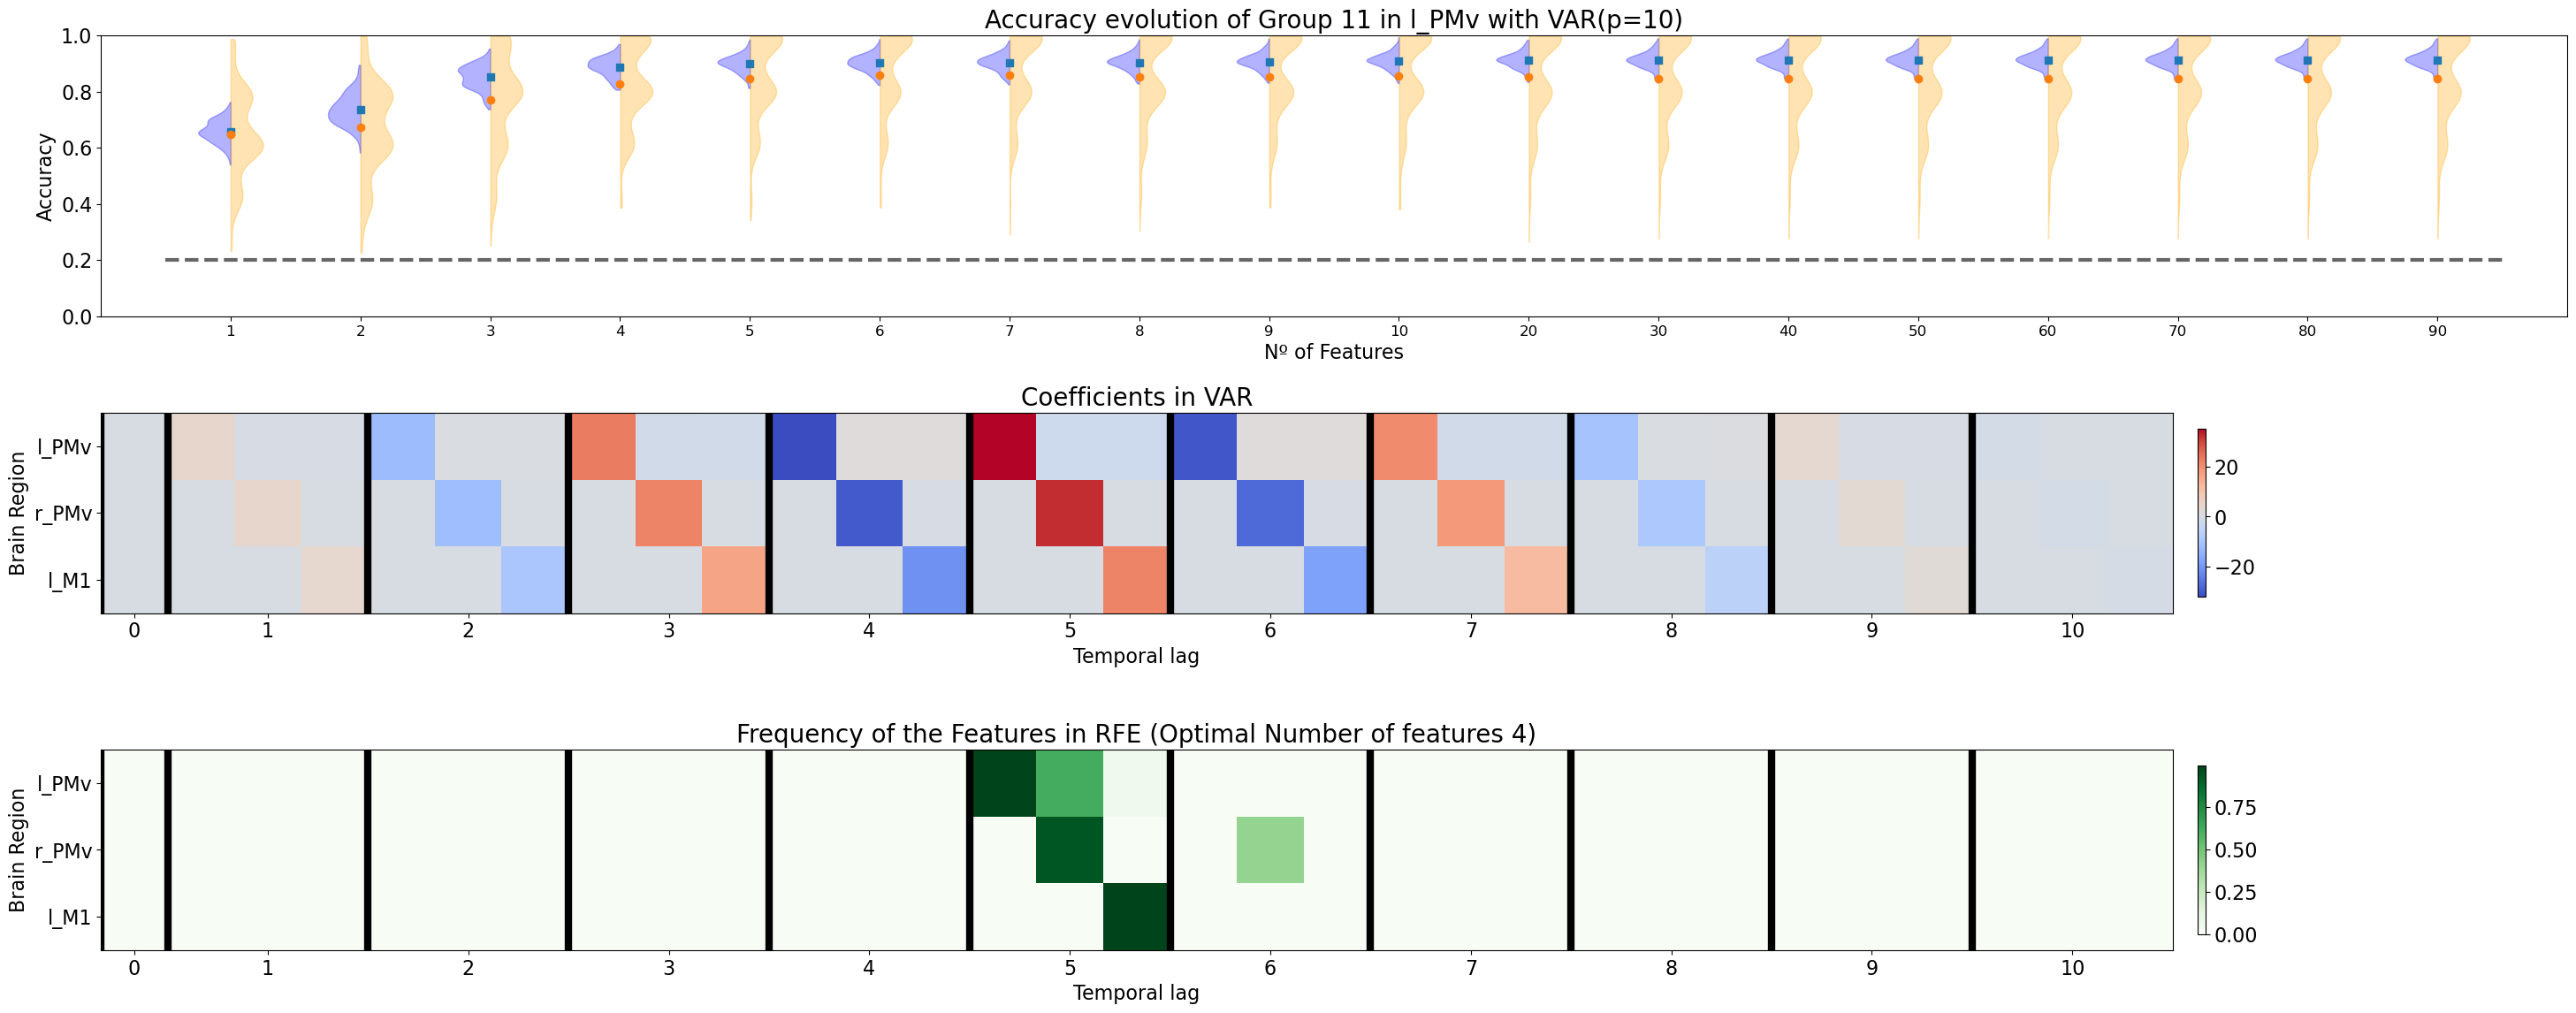

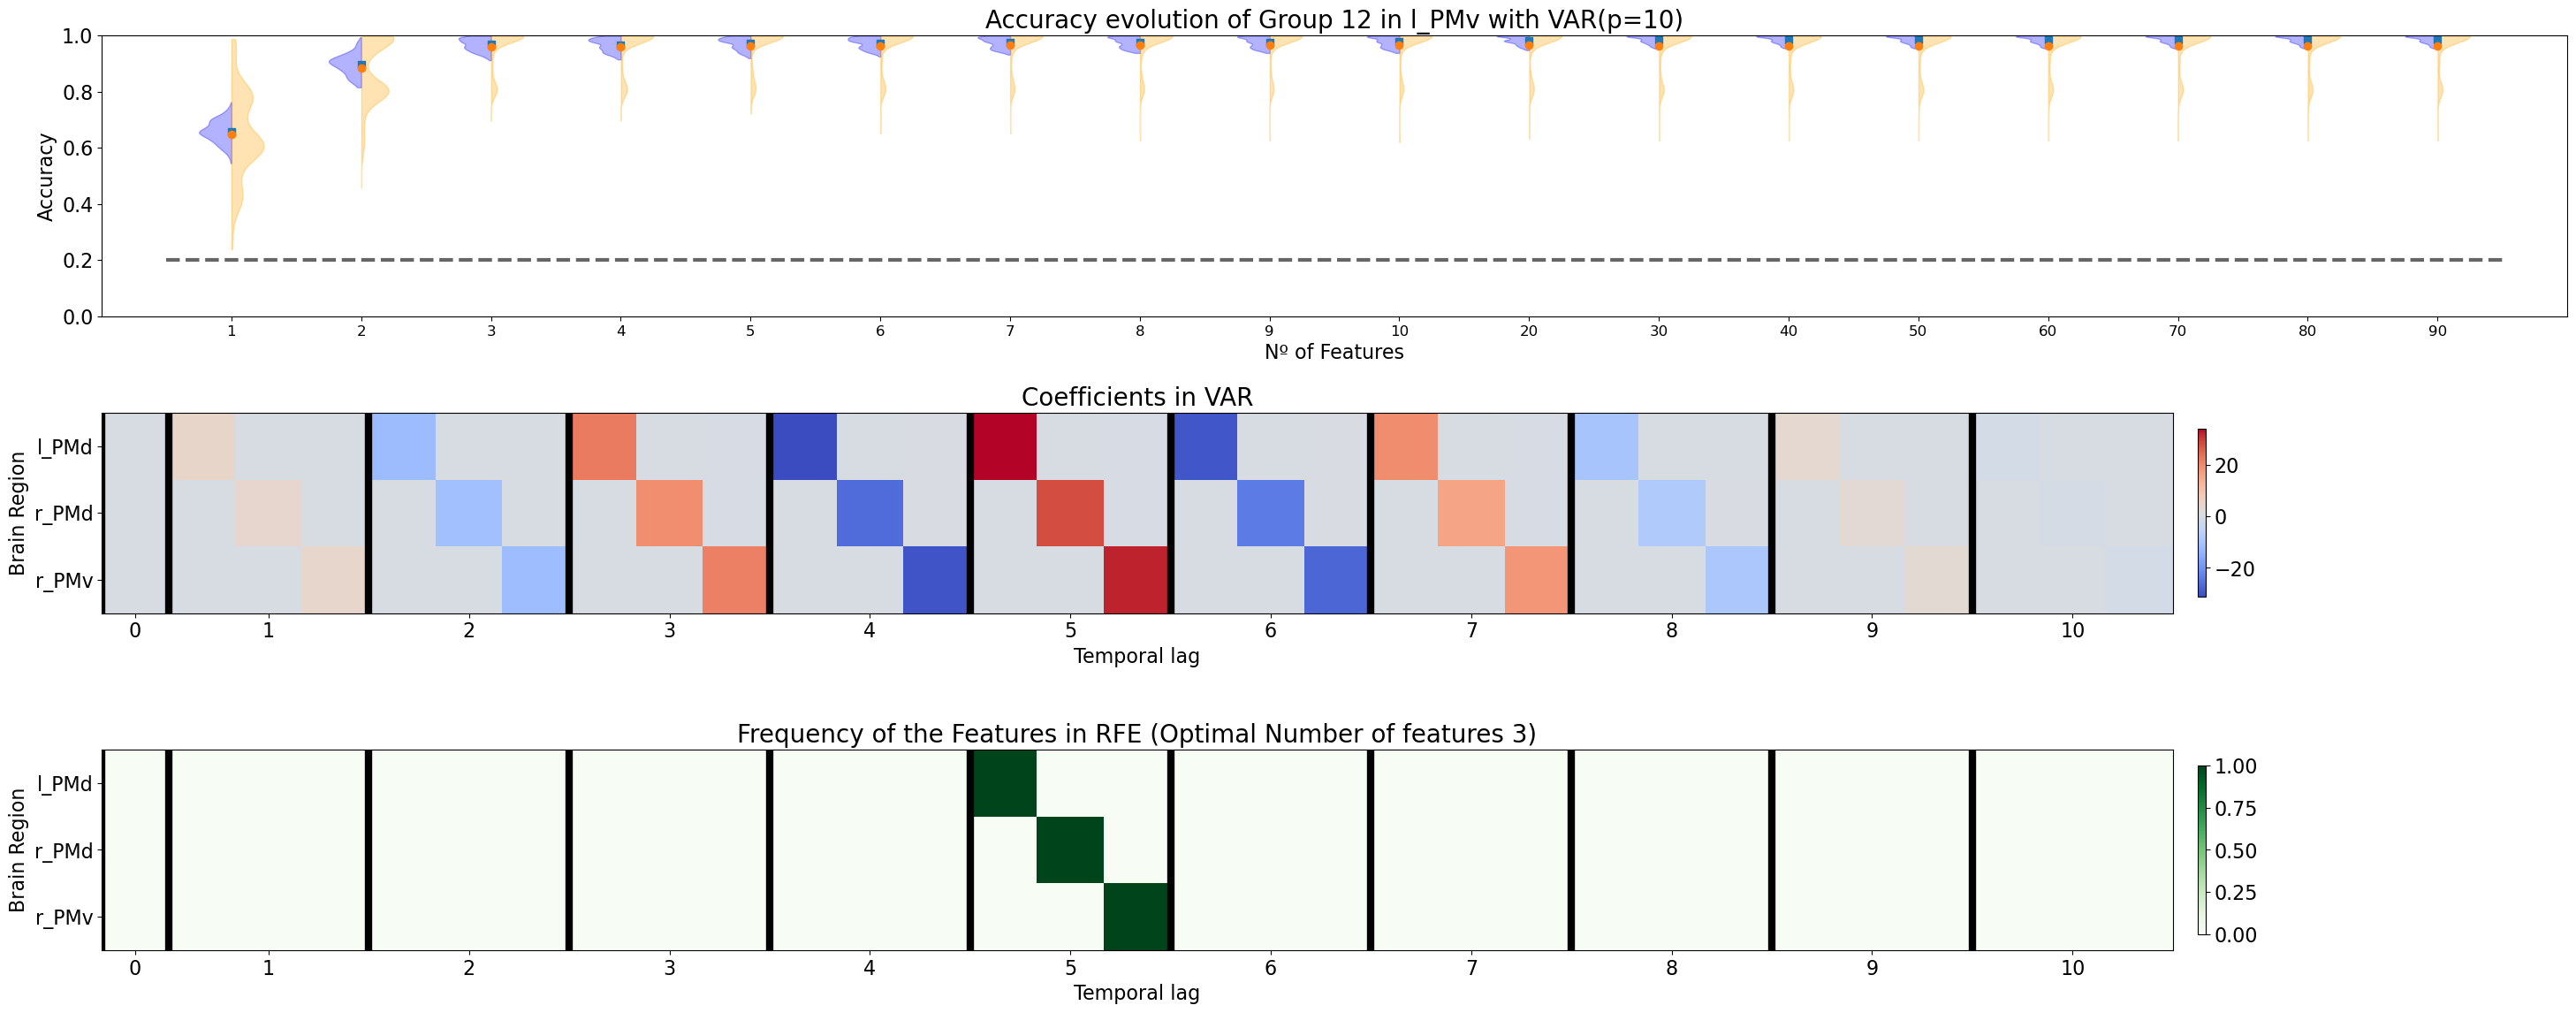

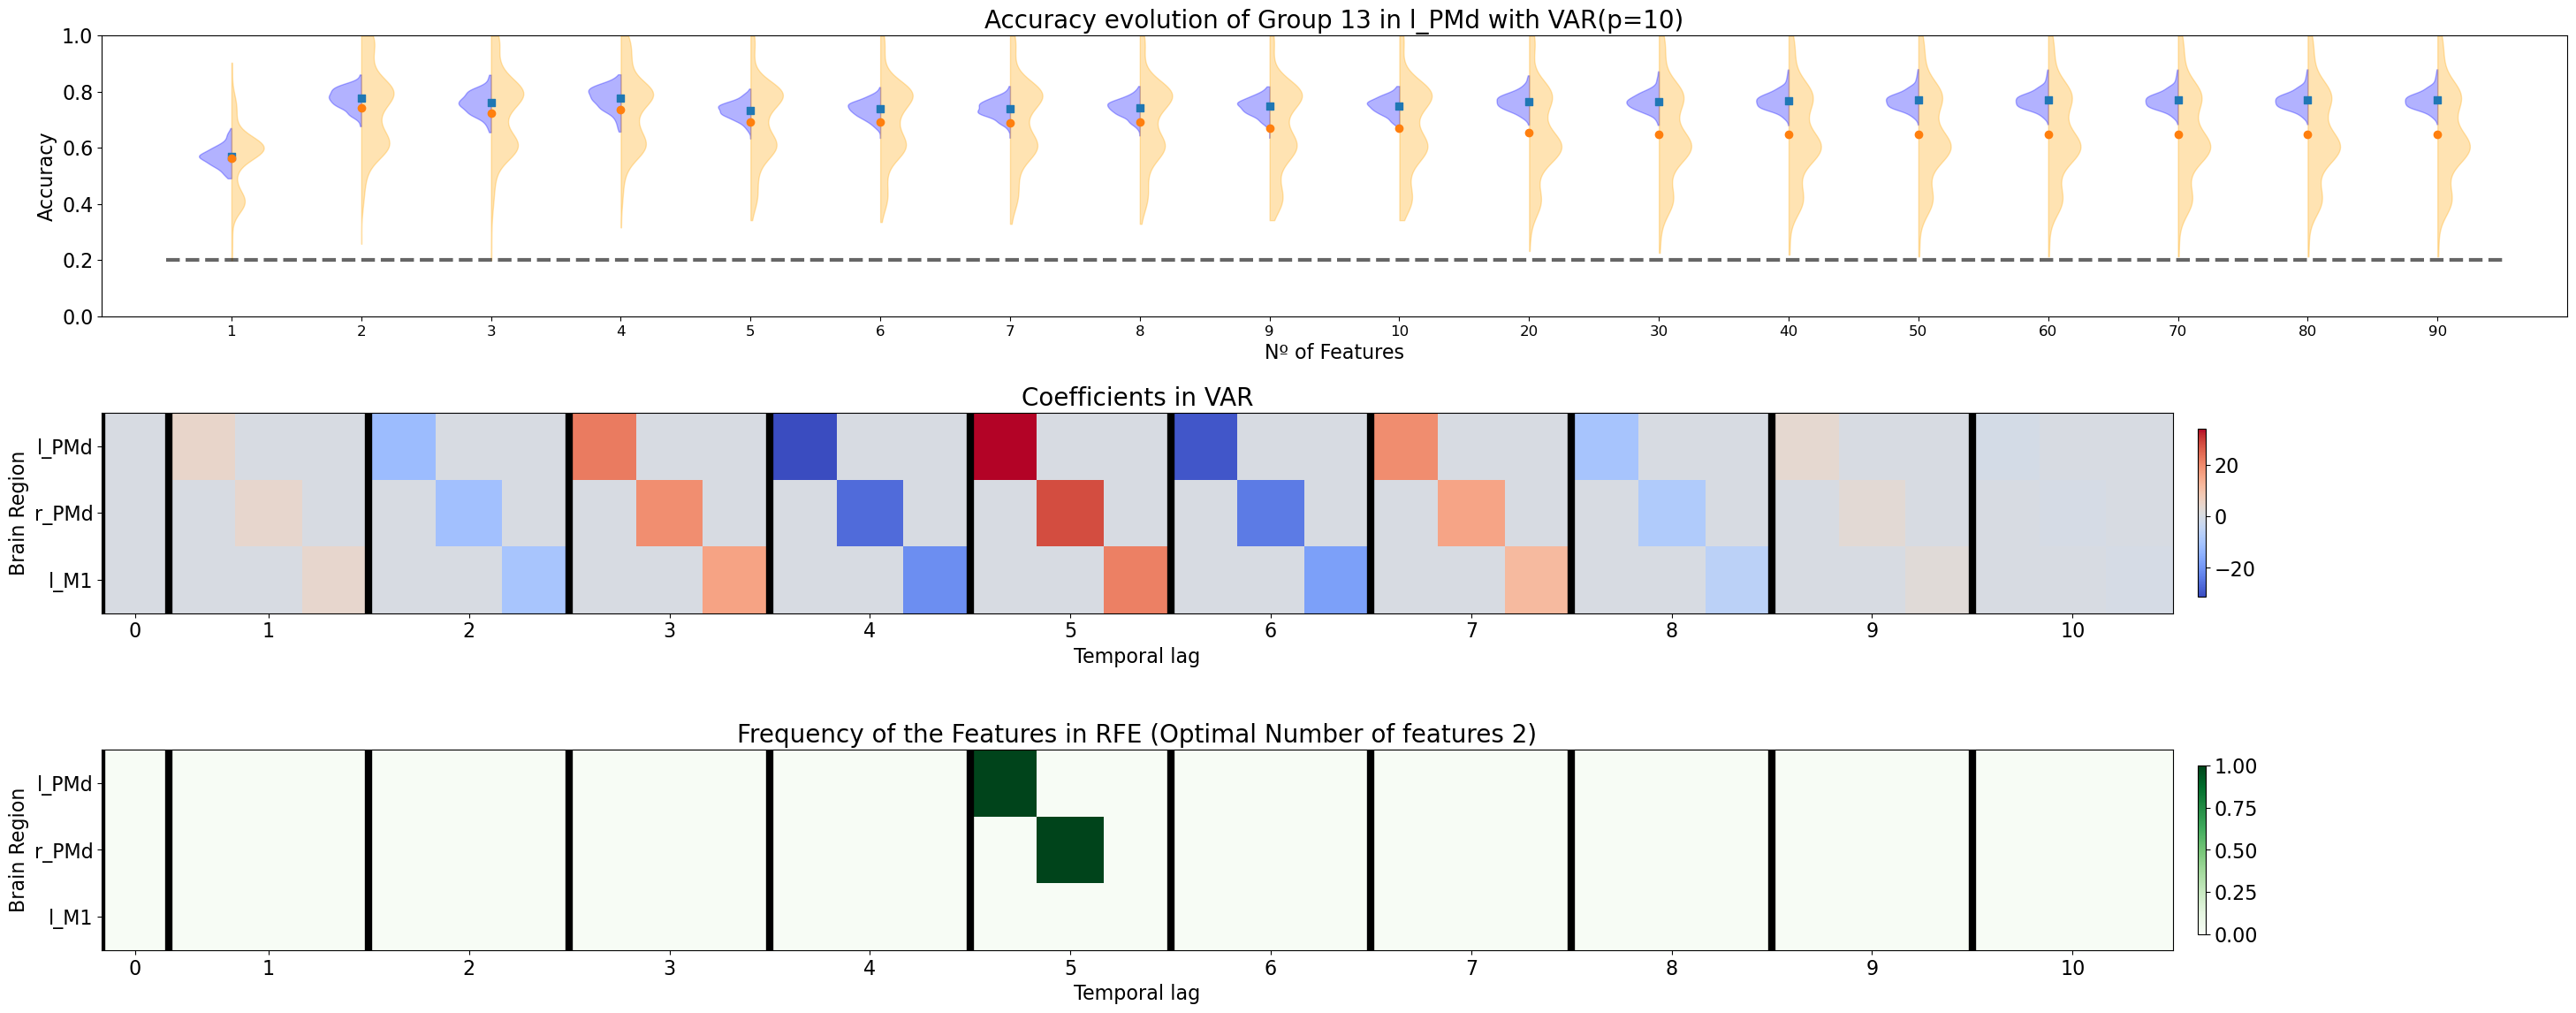

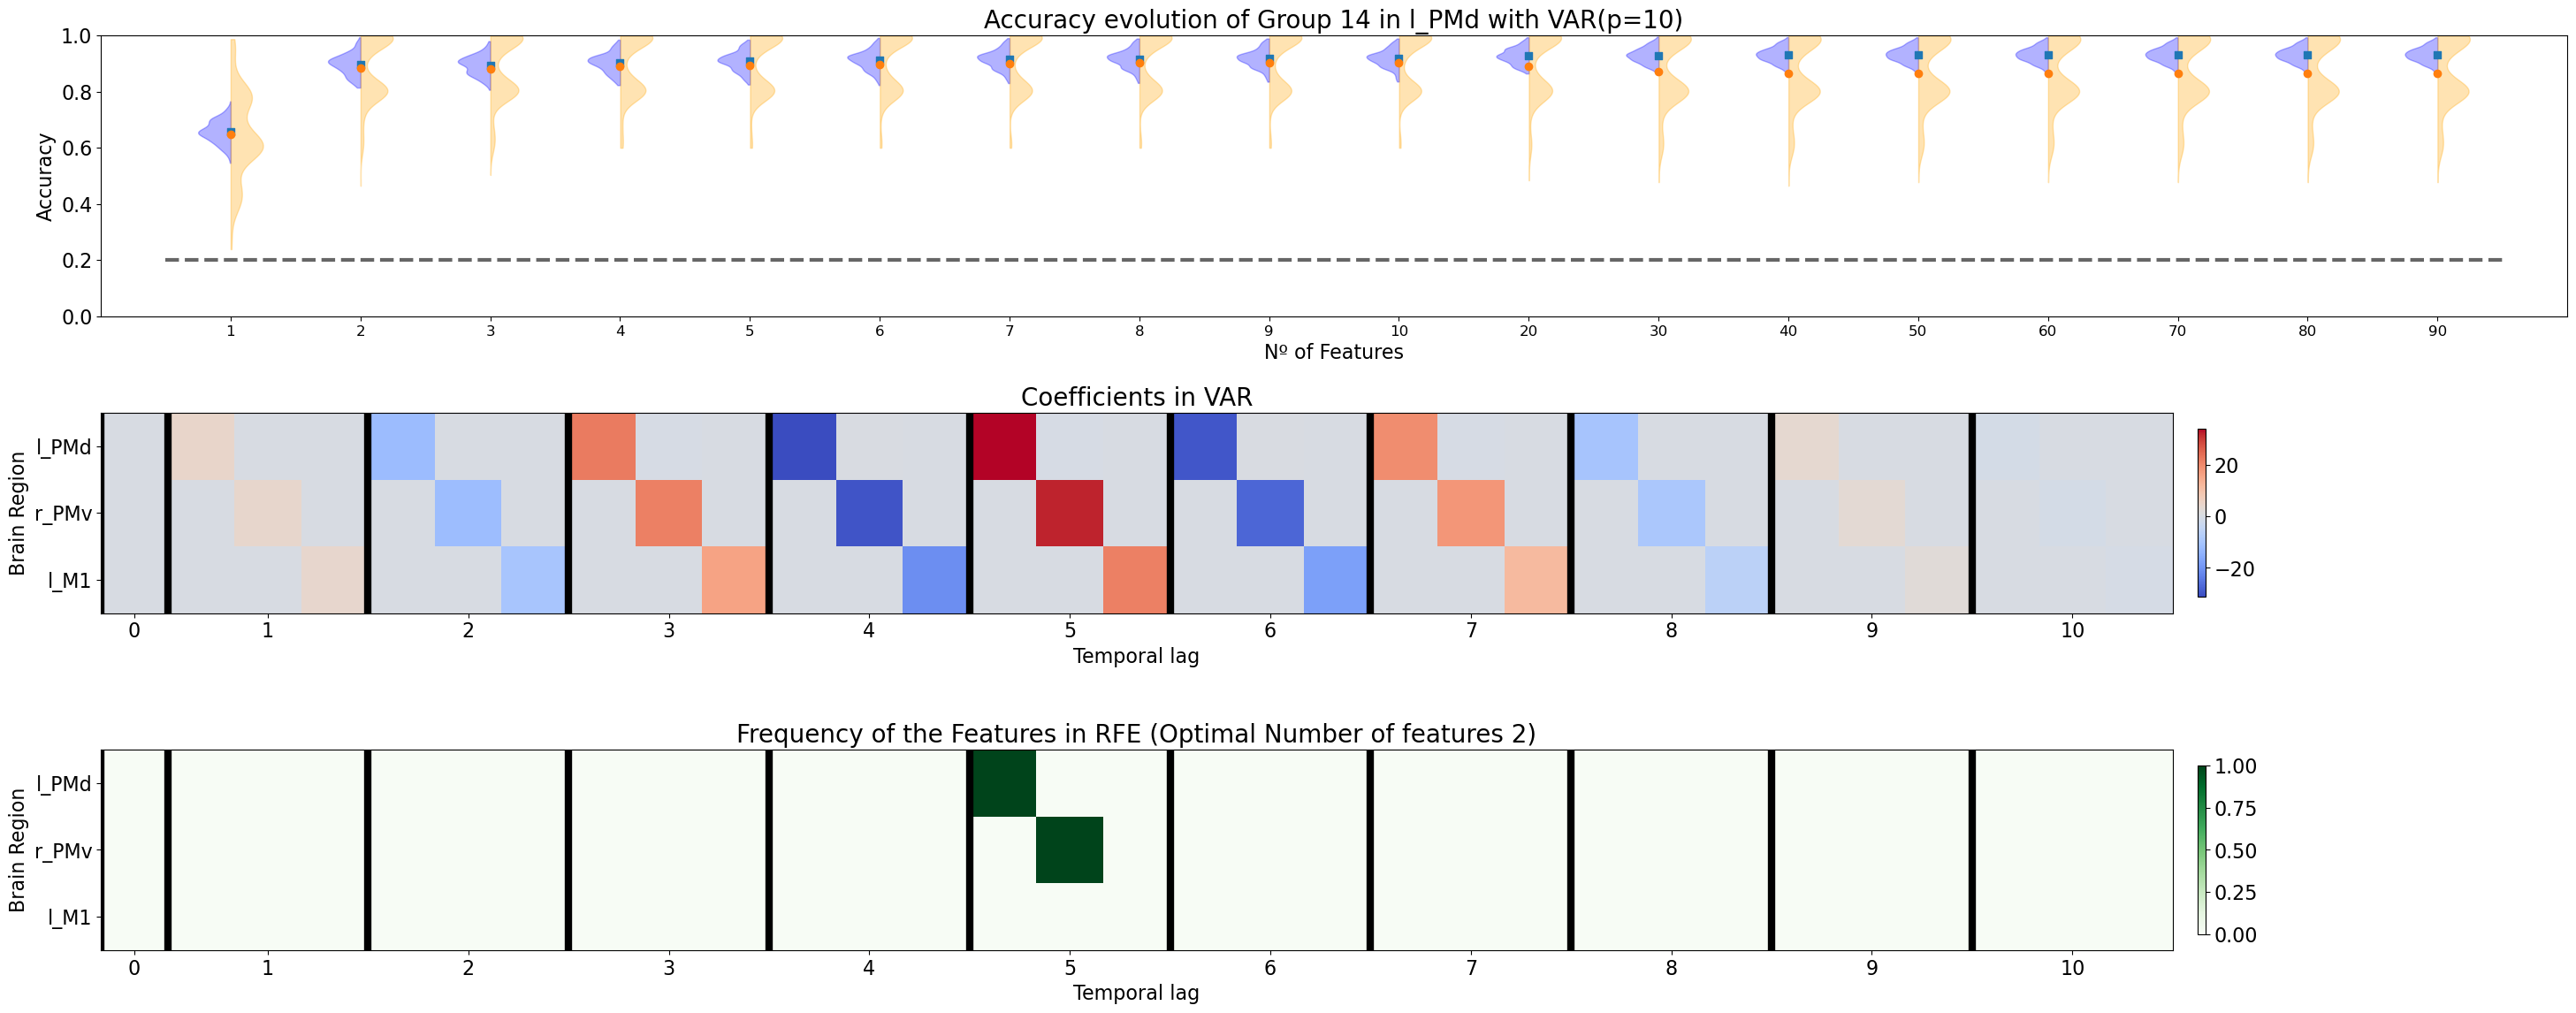

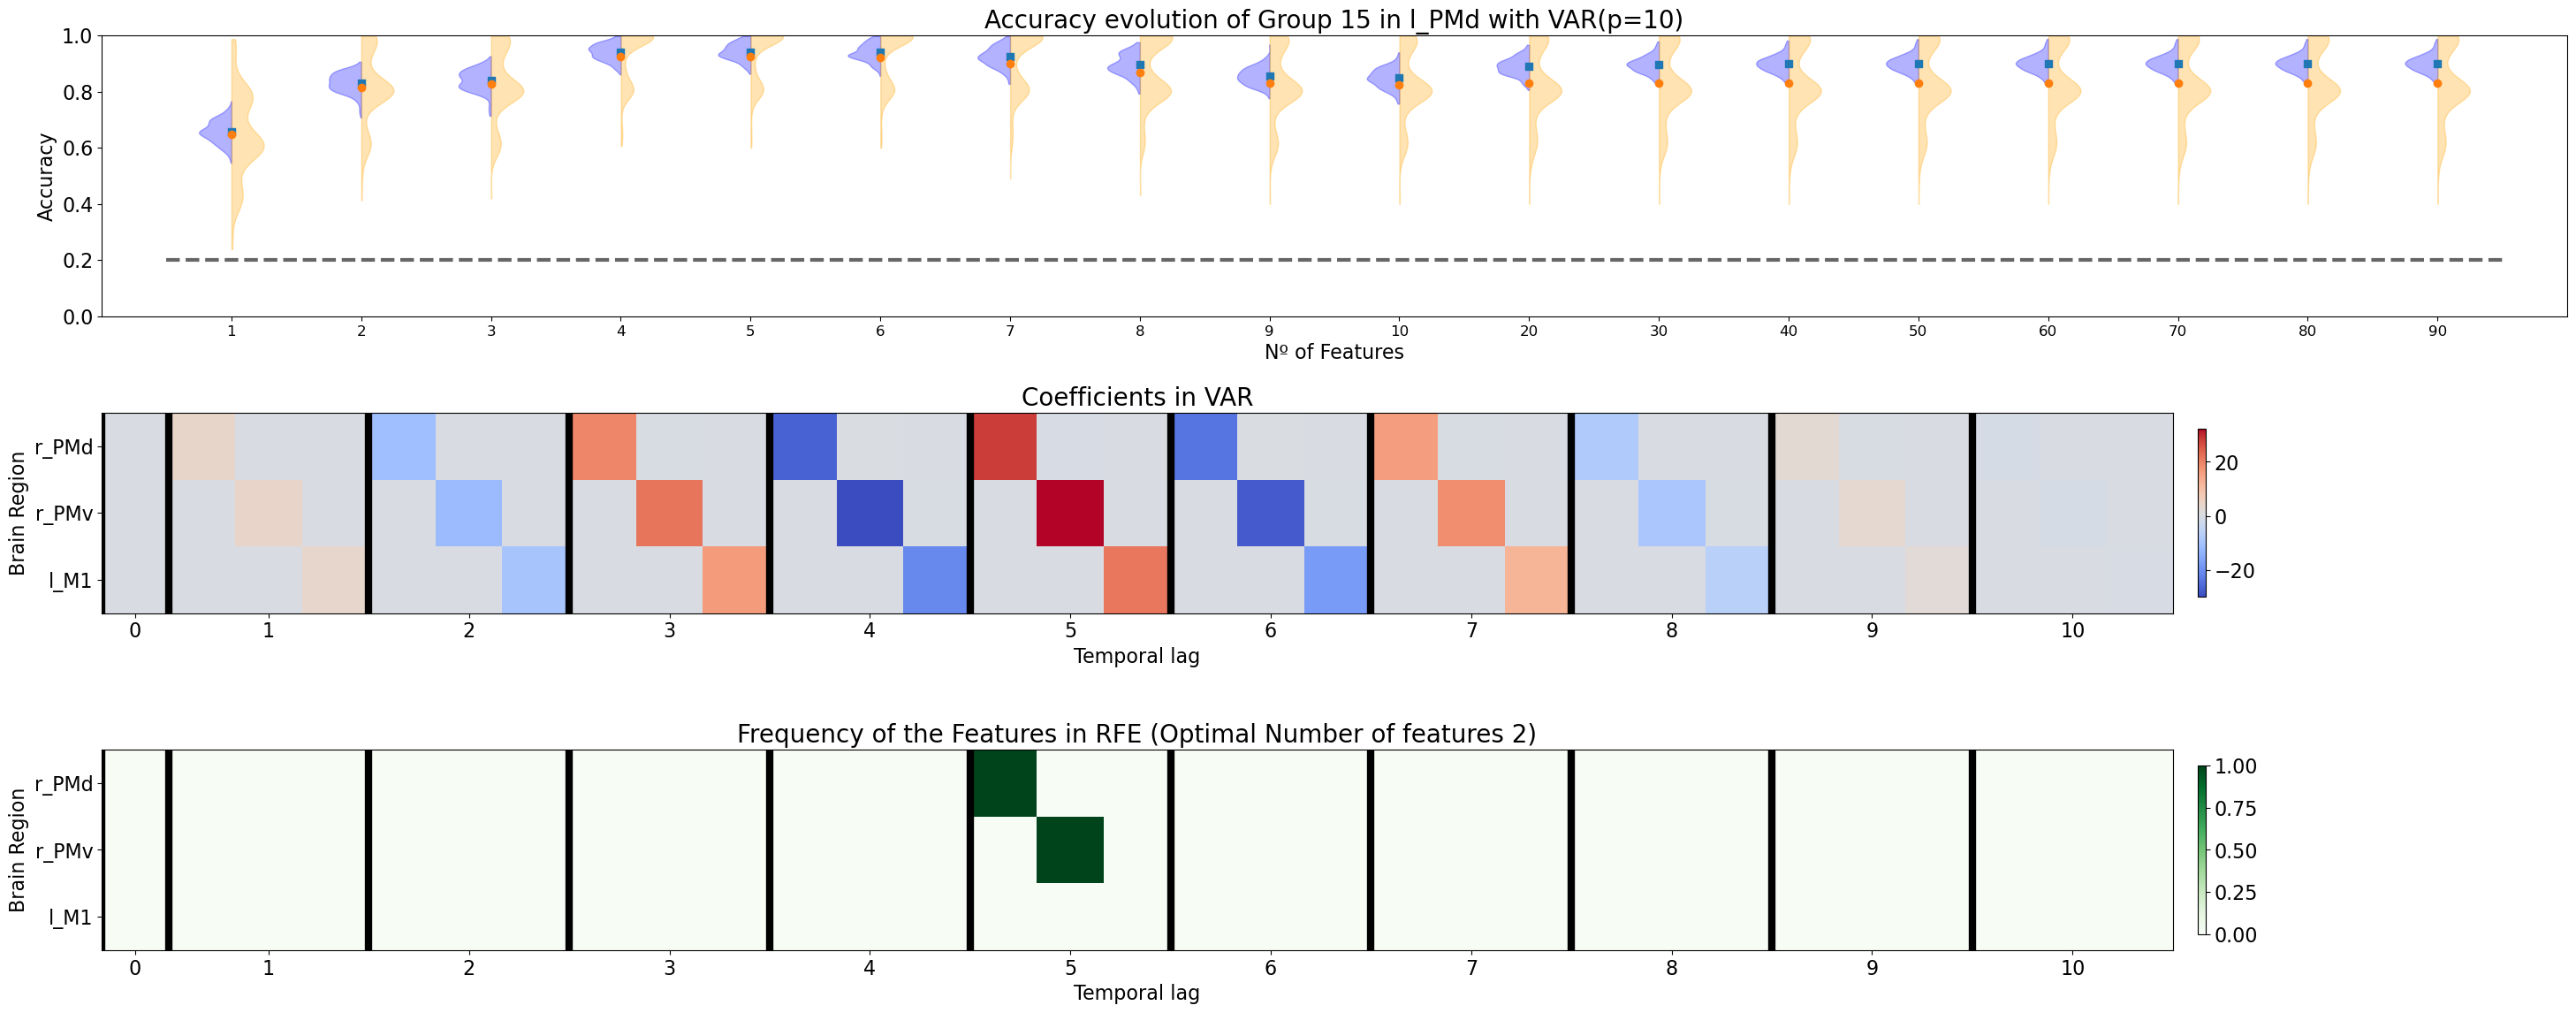

In [494]:
for counter, channels in enumerate(options):
    order = order[counter]
    n_features = len(channels)*len(channels)*order+len(channels)
    if p0>n_features > 50: 
        obj_features=np.concatenate((np.arange(1,10),np.arange(10,n_features,10))).astype(int) #multi-channel model
    else:
        obj_features=np.concatenate((np.arange(1,10),np.arange(10,n_features,2))).astype(int) #single-channel model
    size_rfe=len(obj_features)
    acc = np.array(gacc[channel]).astype(float)
    prec = np.array(gprec[channel]).astype(float)

    fig,axis = plt.subplots(3,1,figsize=(3*orders[channel]+1,12))
    n_violins = size_rfe
    violinsP = axis[0].violinplot(prec.T,showextrema=False)
    counter = 0
    for vP in violinsP['bodies']:
        vP.set_color('blue')
        m = np.mean(vP.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        vP.get_paths()[0].vertices[:, 0] = np.clip(vP.get_paths()[0].vertices[:, 0], -np.inf, m)
        counter+=1

    # counter = 0
    # for partname in ('cbars'):
    #     vp = violinsP[partname]
    #     vp.set_edgecolor(colors)
    #     vp.set_linewidth(1)
    #     counter+=1

    violins = axis[0].violinplot(acc.T,showextrema=False)
    counter = 0
    for v in violins['bodies']:
        v.set_color('orange')
        m = np.mean(v.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        v.get_paths()[0].vertices[:, 0] = np.clip(v.get_paths()[0].vertices[:, 0], m, np.inf)
        counter+=1

    # counter = 0
    # for partname in ('cbars','cmins','cmaxes'):
    #     vp = violins[partname]
    #     vp.set_edgecolor(colors)
    #     vp.set_linewidth(1)
    #     counter+=1

    axis[0].set_xticks(np.arange(n_violins)+1,obj_features.astype(str), fontsize=12)
    axis[0].set_xlabel('Nº of Features')
    axis[0].set_ylabel(r'Accuracy')
        # ax2 = axs.twinx()
    # ax2.set_ylim((0,1))
    #axs.plot(np.arange(n_violins)+1,np.zeros(n_violins)+output[:][options[ii]], label =r'$\overline{Acc({S_{BC}})}$', c= 'black', alpha=.6)
#     print(np.shape(prec))
    axis[0].scatter(np.arange(n_violins)+1,np.mean(prec,axis=1), marker="s")
    axis[0].scatter(np.arange(n_violins)+1,np.mean(acc,axis=1))
    axis[0].scatter([-2],[3], label =r'$\overline{Acc}(D_{\mathcal{T}})$', c= 'black', marker="s")
    axis[0].scatter([-2],[3], label =r'$\overline{Acc}(D_{\mathcal{TT}})$', c= 'black')
    axis[0].set_ylim((0,1))
    axis[0].plot([0.5,n_violins+0.5],[0.2,0.2], ls='dashed', c='black', lw=3, alpha=.6)
    axis[0].set_xlim((0,n_violins+1))
    U1, p = mannwhitneyu(np.array(acc), np.array(np.zeros((n_violins,100)))+0.2,axis=1)
    for f in range(n_violins):
        if(p[f]>0.05):
            axis[0].text(f+0.5,np.min(acc[f])+0.05, "{:.2f}".format(p[f]),fontsize=12)
    axis[0].set_title(r'Accuracy evolution of Group '+"{:d}".format(options[channel])+" in "+name_regions[channel//12]+" with VAR(p="+"{:d}".format(orders[channel])+")")

    
    
    ################################################################
    
    
    
    
    X = np.load('var_models/ARdataset_order'+str(orders[channel])+'X2_G'+str(channel+1)+'size31.npy')
    Y = np.load('var_models/ARdataset_order'+str(orders[channel])+'Y2_G'+str(channel+1)+'size31.npy')
    siz = np.shape(grel_feat[channel][int(ind_opt[channel]),:,:])[1]
    cv = np.zeros(siz)
    nf = int(opt[channel])
    for i in range(siz):
        for t in range(300):
            if grel_feat[channel][int(ind_opt[channel]),t,i]>-1:
                cv[int(grel_feat[channel][int(ind_opt[channel]),t,i])] += 1

    print_Matrix(np.mean(X,axis=0),orders[channel],axis[1],0)
    print_Matrix(cv/300,orders[channel],axis[2],1)
    axis[1].set_title('Coefficients in VAR')
    axis[2].set_title('Frequency of the Features in RFE (Optimal Number of features '+str(nf)+')')
    axis[1].set_yticks(range(3),TICKS2[channel])
    axis[1].set_ylabel('Brain Region')
    axis[1].set_xlabel('Temporal lag')
    axis[2].set_yticks(range(3),TICKS2[channel])
    axis[2].set_ylabel('Brain Region')
    axis[2].set_xlabel('Temporal lag')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3)
    plt.savefig('RFE_Analysis_G'+str(channel)+'.pdf')
    plt.show()
    

This is the performance of terms of accuracy and precision (accuracy in Trainingset) of the Multinomial Logistic Regression on the VAR(p) matrices, when applying Recurssive Feature Elimination, i.e. keeping only the subset of a desired size achieving the best performance. The set of histograms depic the performance for different number of features, while the middle subplot is the VAR(p) characterization; and the bottom figure highlight the probability that a feature is essential in a minimal characterization of the time series.

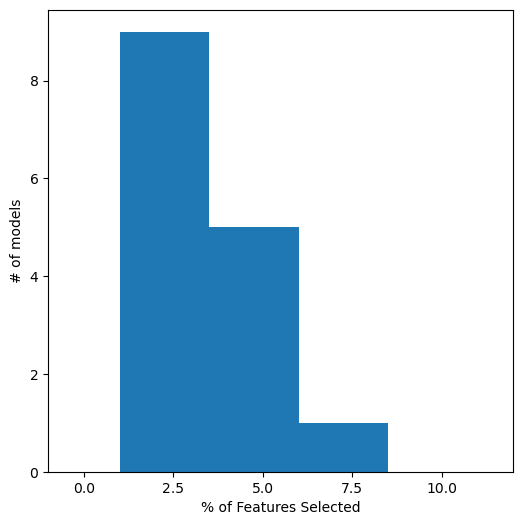

In [138]:
fig, axs=plt.subplots(1,1, figsize=(6,6))
axs.hist(opt/(9*orders+3)*100, bins=np.array([0,0.025,0.05,0.075,0.10])*100)
axs.set_xticks(np.array([0,0.025,0.05,0.075,0.10])*100-1,np.array([0,2.5,5,7.5,10]).astype(str))
axs.set_xlim((-2,11))
axs.set_xlabel('% of Features Selected')
axs.set_ylabel('# of models')
fig.savefig('RFE_feaures.pdf')

This distribution shows the required number of features from a VAR(p) representation, considering the optimal number of features selected when the model achieve the 80% of the accuracy with all features